In [418]:
# load dependencies'
# Import modules

from collections import Counter

import geopandas as gpd
import libpysal as lps
import mapclassify as mc
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import pysal as ps
from pysal.explore import esda as esda
from matplotlib import colors

import seaborn as sns
from shapely.geometry import Point

# scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

# sklearn
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.utils import resample

In [299]:
# load the csv file
df1 = pd.read_csv("C:/Users/emeka/Documents/2nd semester/Floating Car Data Analytics and Visualization for TrafMan and Safety/Project/Data/Excel/Hamburg2016eng.csv", low_memory = False)

In [300]:
# check columns
print("Names of Columns:\n", df1.columns, "\n")
print("\nShape:\n", df1.shape)

Names of Columns:
 Index(['OBJECTID_1', 'OBJECTID', 'Admin0', 'Admin1', 'Admin2', 'Admin3',
       'Year', 'Month', 'Day', 'DayofWeek', 'AccCategory', 'KindoCollision',
       'TypeoAccident', 'LightingCond', 'RoadCondition', 'Bicycle',
       'PassengerCar', 'Pedestrian', 'Motorcycle/Scooter', 'HGV',
       'OtherAccidents', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84'],
      dtype='object') 


Shape:
 (7211, 25)


In [301]:
df1.describe(include ='all')

OBJECTID_1      OBJECTID       Admin0       Admin1       Admin2  \
count  7211.000000   7211.000000  7211.000000  7211.000000  7211.000000   
mean   3606.000000  81431.827624     1.997088     3.338233     7.459437   
std    2081.780728  33624.397037     0.053890     1.868716     5.433202   
min       1.000000    596.000000     1.000000     0.000000     1.000000   
25%    1803.500000  94472.500000     2.000000     2.000000     3.000000   
50%    3606.000000  96283.000000     2.000000     3.000000     7.000000   
75%    5408.500000  98089.500000     2.000000     5.000000    11.000000   
max    7211.000000  99952.000000     2.000000     7.000000    62.000000   

            Admin3    Year        Month          Day    DayofWeek  ...  \
count  7211.000000  7211.0  7211.000000  7211.000000  7211.000000  ...   
mean    350.513244  2016.0     6.783803    13.487727     4.141035  ...   
std     183.621721     0.0     3.206225     4.884515     1.835222  ...   
min      13.000000  2016.0     1.000000     0.000000     1.000000  ...   
25%     201.000000  2016.0     4.000000    10.000000     3.000000  ...   
50%     320.000000  2016.0     7.000000    14.000000     4.000000  ...   
75%     512.000000  2016.0     9.000000    17.000000     6.000000  ...   
max     717.000000  2016.0    12.000000    23.000000     7.000000  ...   

           Bicycle  PassengerCar   Pedestrian  Motorcycle/Scooter  \
count  7211.000000   7211.000000  7211.000000         7211.000000   
mean      0.306892      0.844543     0.132991            0.099154   
std       0.461236      0.362365     0.339589            0.298889   
min       0.000000      0.000000     0.000000            0.000000   
25%       0.000000      1.000000     0.000000            0.000000   
50%       0.000000      1.000000     0.000000            0.000000   
75%       1.000000      1.000000     0.000000            0.000000   
max       1.000000      1.000000     1.000000            1.000000   

               HGV  OtherAccidents        LINREFX       LINREFY    XGCSWGS84  \
count  7211.000000     7211.000000    7211.000000  7.211000e+03  7211.000000   
mean      0.052975        0.135071  566988.905589  5.935857e+06    10.011517   
std       0.223998        0.341824    5703.008664  5.434251e+03     0.086126   
min       0.000000        0.000000  548823.431500  5.919192e+06     9.737525   
25%       0.000000        0.000000  563214.173200  5.933769e+06     9.954657   
50%       0.000000        0.000000  566826.112300  5.936065e+06    10.009298   
75%       0.000000        0.000000  570712.733950  5.939180e+06    10.068461   
max       1.000000        1.000000  583789.020700  5.952756e+06    10.262370   

         YGCSWGS84  
count  7211.000000  
mean     53.567268  
std       0.048826  
min      53.416258  
25%      53.548715  
50%      53.569187  
75%      53.597292  
max      53.718063  

[8 rows x 25 columns]

## Data Cleaning
***

In [302]:
# Check if any field is empty
df1.isna()

OBJECTID_1  OBJECTID  Admin0  Admin1  Admin2  Admin3   Year  Month  \
0          False     False   False   False   False   False  False  False   
1          False     False   False   False   False   False  False  False   
2          False     False   False   False   False   False  False  False   
3          False     False   False   False   False   False  False  False   
4          False     False   False   False   False   False  False  False   
...          ...       ...     ...     ...     ...     ...    ...    ...   
7206       False     False   False   False   False   False  False  False   
7207       False     False   False   False   False   False  False  False   
7208       False     False   False   False   False   False  False  False   
7209       False     False   False   False   False   False  False  False   
7210       False     False   False   False   False   False  False  False   

        Day  DayofWeek  ...  Bicycle  PassengerCar  Pedestrian  \
0     False      False  ...    False         False       False   
1     False      False  ...    False         False       False   
2     False      False  ...    False         False       False   
3     False      False  ...    False         False       False   
4     False      False  ...    False         False       False   
...     ...        ...  ...      ...           ...         ...   
7206  False      False  ...    False         False       False   
7207  False      False  ...    False         False       False   
7208  False      False  ...    False         False       False   
7209  False      False  ...    False         False       False   
7210  False      False  ...    False         False       False   

      Motorcycle/Scooter    HGV  OtherAccidents  LINREFX  LINREFY  XGCSWGS84  \
0                  False  False           False    False    False      False   
1                  False  False           False    False    False      False   
2                  False  False           False    False    False      False   
3                  False  False           False    False    False      False   
4                  False  False           False    False    False      False   
...                  ...    ...             ...      ...      ...        ...   
7206               False  False           False    False    False      False   
7207               False  False           False    False    False      False   
7208               False  False           False    False    False      False   
7209               False  False           False    False    False      False   
7210               False  False           False    False    False      False   

      YGCSWGS84  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
7206      False  
7207      False  
7208      False  
7209      False  
7210      False  

[7211 rows x 25 columns]

In [303]:
# Remove any field whose aministrative boundary is outside Hamburg and field that unnecessary for the analysis
filtr = df1['Admin0'] == 1
df1.drop(index=df1[filtr].index, columns=['OBJECTID_1', 'OBJECTID', 'Admin0', 'Admin1', 'Year', 'Day', 'LINREFX', 'LINREFY'], inplace=True)
df2 = pd.DataFrame(df1)
df2.reset_index(inplace = True)
df2

index  Admin2  Admin3  Month  DayofWeek  AccCategory  KindoCollision  \
0        11       9     710      2          4            3               2   
1        12      19     140      4          7            3               2   
2        13       9     610      1          2            2               6   
3        14       1     102      3          7            2               2   
4        15       5     317      2          1            3               9   
...     ...     ...     ...    ...        ...          ...             ...   
7185   7206       1     701     12          6            3               0   
7186   7207      16     524     12          6            3               5   
7187   7208       8     320     12          5            3               2   
7188   7209      16     136     12          2            3               0   
7189   7210      18     526     12          5            3               5   

      TypeoAccident  LightingCond  RoadCondition  Bicycle  PassengerCar  \
0                 2             0              0        0             1   
1                 6             0              0        0             1   
2                 4             0              0        0             1   
3                 6             0              0        0             1   
4                 1             2              0        0             1   
...             ...           ...            ...      ...           ...   
7185              7             0              0        0             1   
7186              3             1              1        1             1   
7187              6             1              0        0             1   
7188              7             0              0        1             0   
7189              3             0              0        0             1   

      Pedestrian  Motorcycle/Scooter  HGV  OtherAccidents  XGCSWGS84  \
0              0                   1    0               0   9.967263   
1              0                   0    0               1   9.921465   
2              1                   0    0               0  10.135767   
3              0                   1    0               1   9.993790   
4              0                   0    0               0   9.963099   
...          ...                 ...  ...             ...        ...   
7185           1                   0    0               0   9.978172   
7186           0                   0    0               0  10.134735   
7187           0                   0    0               0   9.908848   
7188           0                   0    0               1  10.014119   
7189           0                   0    0               0  10.178387   

      YGCSWGS84  
0     53.450086  
1     53.518014  
2     53.483877  
3     53.547323  
4     53.600736  
...         ...  
7185  53.458331  
7186  53.670281  
7187  53.610363  
7188  53.518401  
7189  53.590645  

[7190 rows x 18 columns]

In [304]:
# creating new dataframe without coordinates
df2.columns

Index(['index', 'Admin2', 'Admin3', 'Month', 'DayofWeek', 'AccCategory',
       'KindoCollision', 'TypeoAccident', 'LightingCond', 'RoadCondition',
       'Bicycle', 'PassengerCar', 'Pedestrian', 'Motorcycle/Scooter', 'HGV',
       'OtherAccidents', 'XGCSWGS84', 'YGCSWGS84'],
      dtype='object')

In [305]:
df1.drop(columns=['XGCSWGS84', 'YGCSWGS84'], inplace=True)
df3 = pd.DataFrame(df1)
df3.reset_index(inplace = True)
df3
df3.columns
df3.dtypes

level_0               int64
index                 int64
Admin2                int64
Admin3                int64
Month                 int64
DayofWeek             int64
AccCategory           int64
KindoCollision        int64
TypeoAccident         int64
LightingCond          int64
RoadCondition         int64
Bicycle               int64
PassengerCar          int64
Pedestrian            int64
Motorcycle/Scooter    int64
HGV                   int64
OtherAccidents        int64
dtype: object

In [306]:
# drop the remaining nulls
df2.dropna(inplace=True)
df3.dropna(inplace=True)

In [307]:
df2.shape

(7190, 18)

In [308]:
df3.shape

(7190, 17)

In [309]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 0 to 7189
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               7190 non-null   int64  
 1   Admin2              7190 non-null   int64  
 2   Admin3              7190 non-null   int64  
 3   Month               7190 non-null   int64  
 4   DayofWeek           7190 non-null   int64  
 5   AccCategory         7190 non-null   int64  
 6   KindoCollision      7190 non-null   int64  
 7   TypeoAccident       7190 non-null   int64  
 8   LightingCond        7190 non-null   int64  
 9   RoadCondition       7190 non-null   int64  
 10  Bicycle             7190 non-null   int64  
 11  PassengerCar        7190 non-null   int64  
 12  Pedestrian          7190 non-null   int64  
 13  Motorcycle/Scooter  7190 non-null   int64  
 14  HGV                 7190 non-null   int64  
 15  OtherAccidents      7190 non-null   int64  
 16  XGCSWG

In [310]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 0 to 7189
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   level_0             7190 non-null   int64
 1   index               7190 non-null   int64
 2   Admin2              7190 non-null   int64
 3   Admin3              7190 non-null   int64
 4   Month               7190 non-null   int64
 5   DayofWeek           7190 non-null   int64
 6   AccCategory         7190 non-null   int64
 7   KindoCollision      7190 non-null   int64
 8   TypeoAccident       7190 non-null   int64
 9   LightingCond        7190 non-null   int64
 10  RoadCondition       7190 non-null   int64
 11  Bicycle             7190 non-null   int64
 12  PassengerCar        7190 non-null   int64
 13  Pedestrian          7190 non-null   int64
 14  Motorcycle/Scooter  7190 non-null   int64
 15  HGV                 7190 non-null   int64
 16  OtherAccidents      7190 non-null   int64


In [311]:
# standardize all column names to lowercase, and remove some characters 
# for ease of use in querying
df2.columns = map(str.lower, df2.columns)
df3.columns = map(str.lower, df3.columns)

## Univariate Analysis
___________

In [312]:
# checking distribution of columns while detecting outliers of numerical columns (all ints excluding All administrative boundary, lat/long and year)
df_num = df3[['month','dayofweek','acccategory','kindocollision', 'typeoaccident', 'lightingcond', 'roadcondition', 'bicycle', 'passengercar', 'pedestrian', 'motorcycle/scooter', 'hgv', 'otheraccidents']]

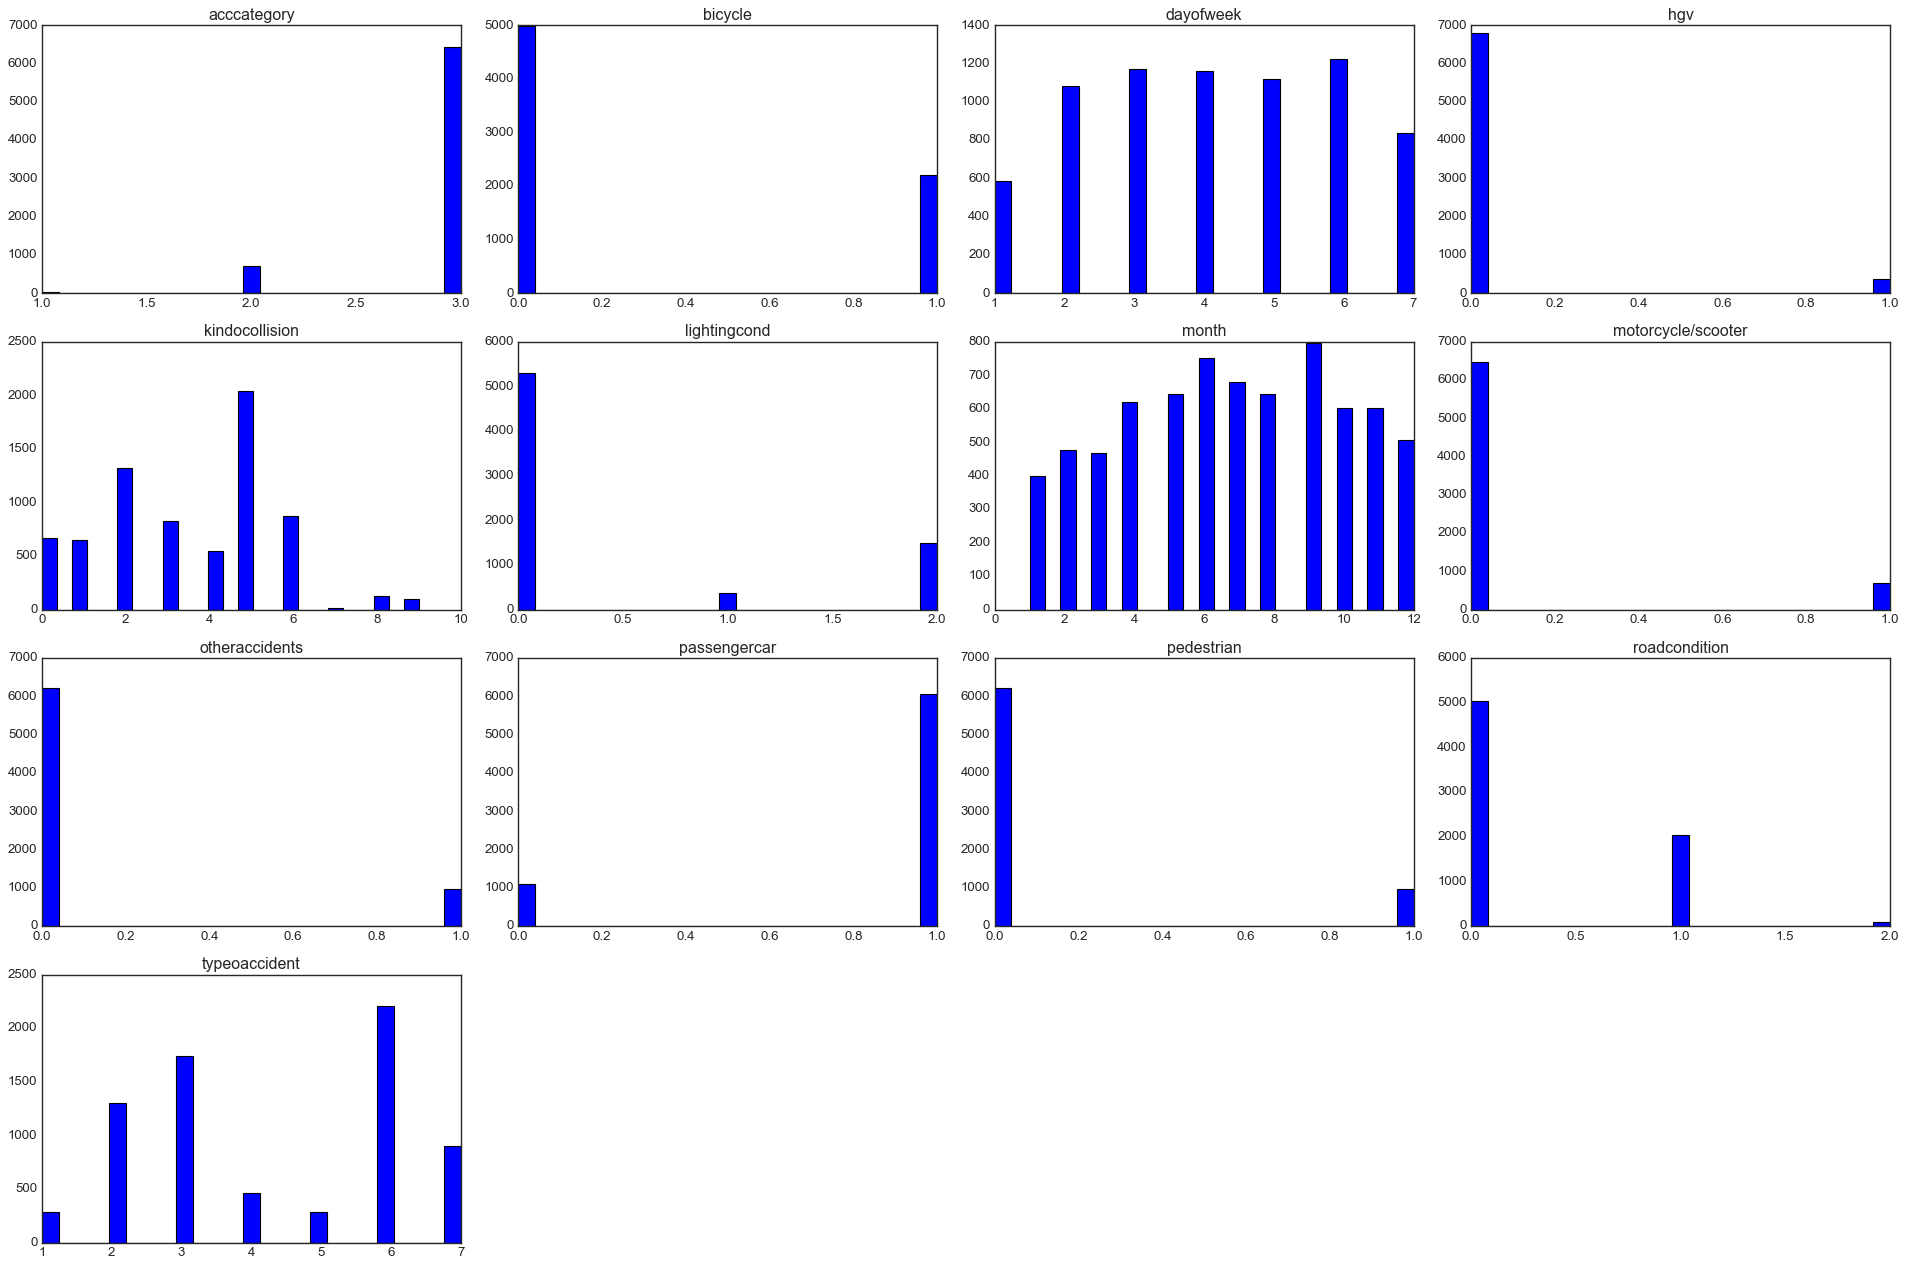

In [313]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')
plt.tight_layout(rect=(0, 0, 2, 2))

### Feature Manipulation Creation and Engineering
***

In [314]:
# checking for the number of unique values by column
df3.nunique().sort_values(ascending=False)

level_0               7190
index                 7190
admin3                 178
admin2                  20
month                   12
kindocollision          10
dayofweek                7
typeoaccident            7
lightingcond             3
acccategory              3
roadcondition            3
hgv                      2
bicycle                  2
passengercar             2
pedestrian               2
motorcycle/scooter       2
otheraccidents           2
dtype: int64

In [315]:
# days of the week
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=1, 
                                                        value="Sunday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=
                                                        2,
                                                        value="Monday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=3, 
                                                value="Tuesday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=4, 
                                                        value="Wednesday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=5, 
                                                        value="Thursday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=6, 
                                                        value="Friday")
df3['dayofweek'] = df3['dayofweek'].replace(to_replace=7, 
                                                        value="Saturday")

# Day of the week
df3['dayofweek'].value_counts()/df3.shape[0]*100

Friday       17.065369
Tuesday      16.328234
Wednesday    16.189152
Thursday     15.549374
Monday       15.034771
Saturday     11.682893
Sunday        8.150209
Name: dayofweek, dtype: float64

In [316]:
# kind of collision
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=1, 
                                                        value="Stationary Vehicle")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=
                                                        2,
                                                        value="Waiting Vehicle")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=3, 
                                                value="Moving Same Direction")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=4, 
                                                        value="Incoming Vehicle")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=5, 
                                                        value="Crossing Vehicle")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=6, 
                                                        value="Pedestrian")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=7, 
                                                        value="Obstruction")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=8, 
                                                        value="Roadway to Right")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=9, 
                                                        value="Roadway to left")
df3['kindocollision'] = df3['kindocollision'].replace(to_replace=0, 
                                                        value="Others")

In [317]:
df3['kindocollision']

0        Waiting Vehicle
1        Waiting Vehicle
2             Pedestrian
3        Waiting Vehicle
4        Roadway to left
              ...       
7185              Others
7186    Crossing Vehicle
7187     Waiting Vehicle
7188              Others
7189    Crossing Vehicle
Name: kindocollision, Length: 7190, dtype: object

In [318]:
# kind of collision
df3['kindocollision'].value_counts()/df3.shape[0]*100

Crossing Vehicle         28.442281
Waiting Vehicle          18.456189
Pedestrian               12.114047
Moving Same Direction    11.488178
Others                    9.346314
Stationary Vehicle        9.095967
Incoming Vehicle          7.607789
Roadway to Right          1.835883
Roadway to left           1.335188
Obstruction               0.278164
Name: kindocollision, dtype: float64

In [319]:
Kind_of_collision = df3.groupby(['kindocollision'])['acccategory'].count()

In [320]:
# type of accident
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=1, 
                                                        value="Driving")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=
                                                        2,
                                                        value="Turning")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=3, 
                                                value="Turnaround-Crossing")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=4, 
                                                        value="Exceed Speed Limit")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=5, 
                                                        value="Resting Traffic")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=6, 
                                                        value="Longitudinal Traffic")
df3['typeoaccident'] = df3['typeoaccident'].replace(to_replace=7, 
                                                        value="Misc")
df3['typeoaccident'].value_counts()/df3.shape[0]*100

Longitudinal Traffic    30.695410
Turnaround-Crossing     24.158554
Turning                 18.136300
Misc                    12.531293
Exceed Speed Limit       6.453408
Driving                  4.019471
Resting Traffic          4.005563
Name: typeoaccident, dtype: float64

In [321]:
# Lighting Condition
df3['lightingcond'] = df3['lightingcond'].replace(to_replace=0, 
                                                        value="Daylight")
df3['lightingcond'] = df3['lightingcond'].replace(to_replace=
                                                        1,
                                                        value="Dusk_Dawn")
df3['lightingcond'] = df3['lightingcond'].replace(to_replace=2,
                                                  value="Darkness")
df3['lightingcond'].value_counts()/df3.shape[0]*100

Daylight     73.838665
Darkness     20.876217
Dusk_Dawn     5.285118
Name: lightingcond, dtype: float64

In [322]:
# Road Condition
df3['roadcondition'] = df3['roadcondition'].replace(to_replace=0, 
                                                        value="Dry")
df3['roadcondition'] = df3['roadcondition'].replace(to_replace=
                                                        1,
                                                        value="Wet")
df3['roadcondition'] = df3['roadcondition'].replace(to_replace=2,
                                                  value="Winter")
df3['roadcondition'].value_counts()/df3.shape[0]*100

Dry       70.250348
Wet       28.484006
Winter     1.265647
Name: roadcondition, dtype: float64

In [323]:
# creating seasons column for ML

# creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df3['season'] = df3['month'].apply(getSeason)

In [324]:
# number_of_season
df3['season'].value_counts()/df3.shape[0]*100

summer    28.873435
fall      27.844228
spring    24.061196
winter    19.221140
Name: season, dtype: float64

In [325]:
# Categories of accident
df3['acccategory'] = df3['acccategory'].replace(to_replace=1, 
                                                        value="Deaths")
df3['acccategory'] = df3['acccategory'].replace(to_replace=
                                                        2,
                                                        value="Severe")
df3['acccategory'] = df3['acccategory'].replace(to_replace=3,
                                                  value="Slight")
df3['acccategory'].value_counts()/df3.shape[0]*100

Slight    89.666203
Severe    10.000000
Deaths     0.333797
Name: acccategory, dtype: float64

In [326]:
# Put above pickle in next full run
# create new column for Machine Learning and Visualization with Not Serious and Serious
df3['accident_severity'] = df3['acccategory']
df3['accident_severity'] = df3['accident_severity'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df3['accident_severity'] = df3['accident_severity'].replace(to_replace="Severe",
                                                                value="Serious")
df3['accident_severity'] = df3['accident_severity'].replace(to_replace="Deaths", 
                                                                value="Serious")
df3.shape

(7190, 19)

In [327]:
df3.accident_severity.value_counts()

Not Serious    6447
Serious         743
Name: accident_severity, dtype: int64

#### General Visualization
____

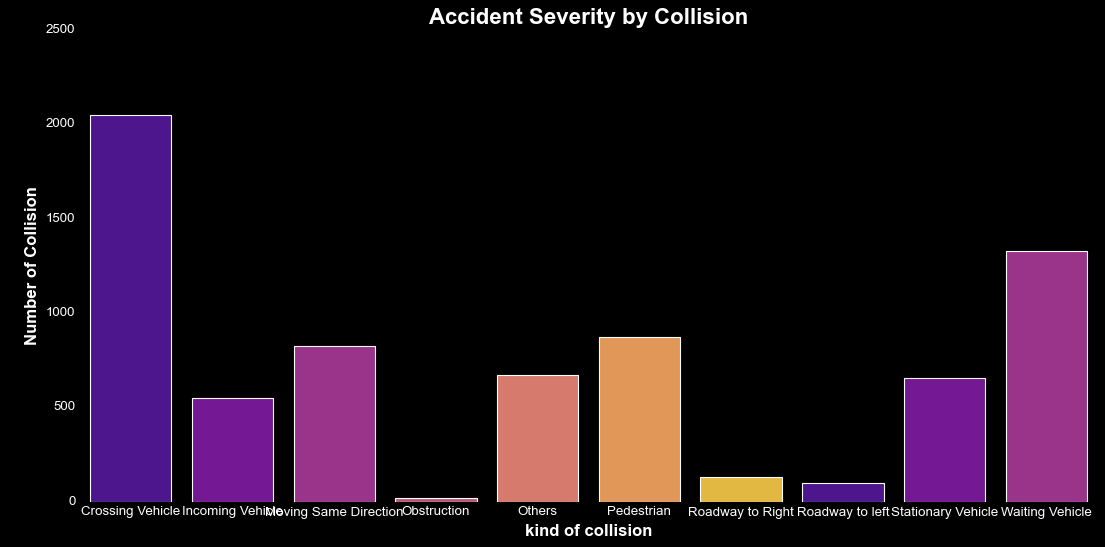

In [328]:
kind_of_collision = df3.groupby(['kindocollision'])['acccategory'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(14,7))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(kind_of_collision.index, kind_of_collision.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accident Severity by Collision",fontsize=20,fontweight="bold")
plt.xlabel("kind of collision", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Collision", fontsize=15, fontweight="bold")
plt.savefig('accident_severity_by_collision.png')
plt.tight_layout()

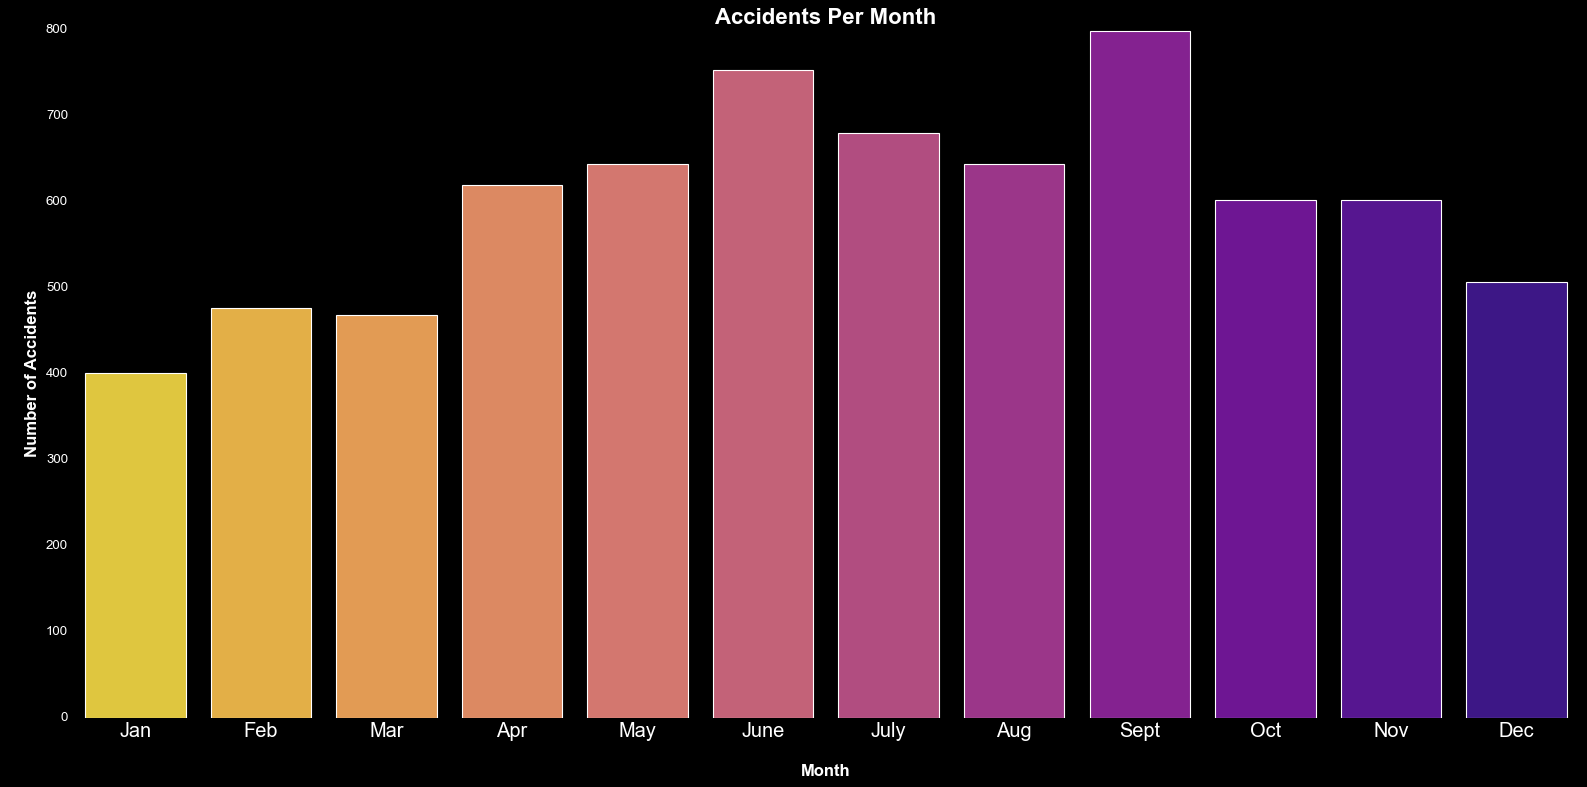

In [329]:
accidentspermonth = df3.groupby(['month'])['acccategory'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("plasma_r", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents Per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()

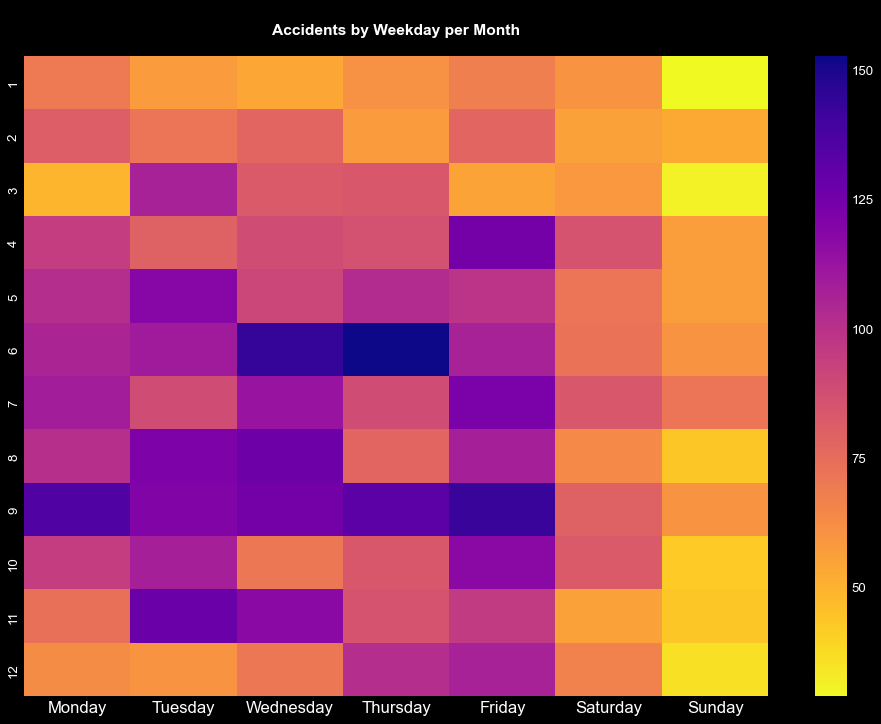

In [330]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df3.groupby(['month', 'dayofweek']).size()
accweekday = accweekday.rename_axis(['month', 'dayofweek'])\
                               .unstack('dayofweek')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Month\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdaypermonth.png')
plt.show()

**__Fridays are the day of the week where the most accidents occur.__**

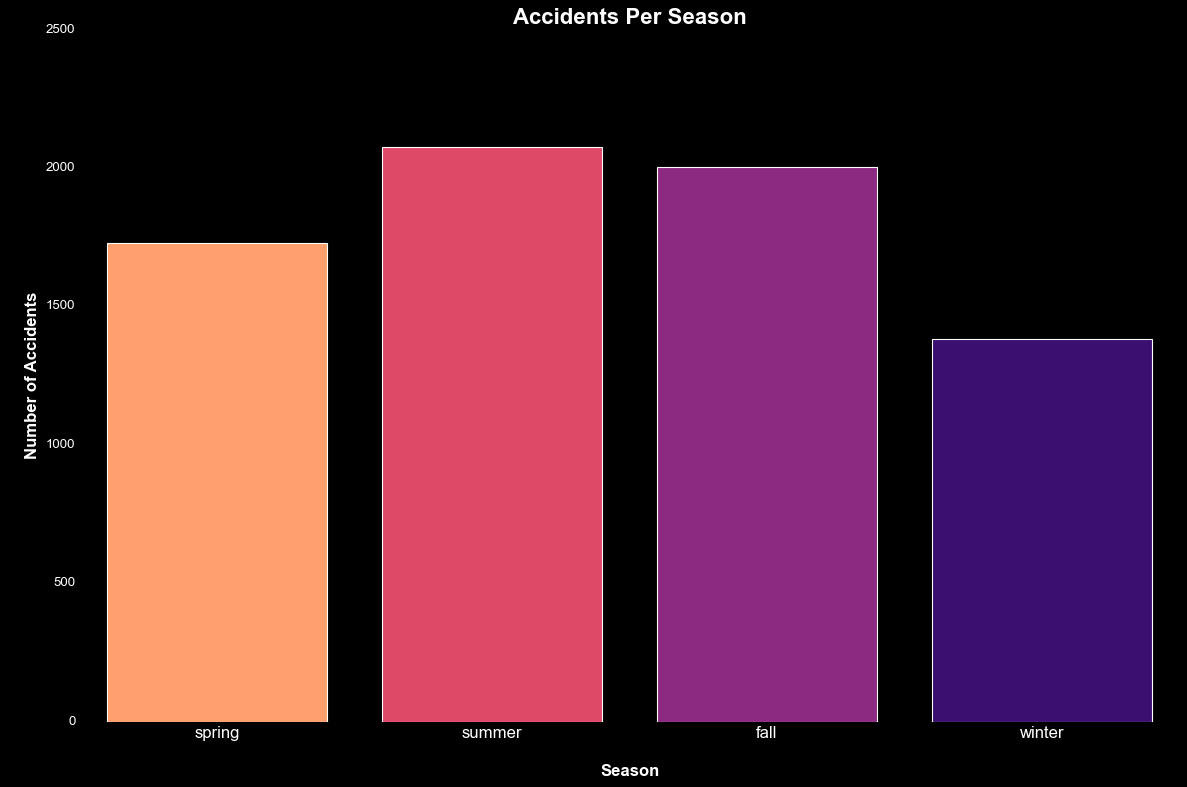

In [331]:
accidentsperseason = df3.groupby(['season'])['acccategory'].count()
seaord=['spring', 'summer', 'fall','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentsperseason.png')


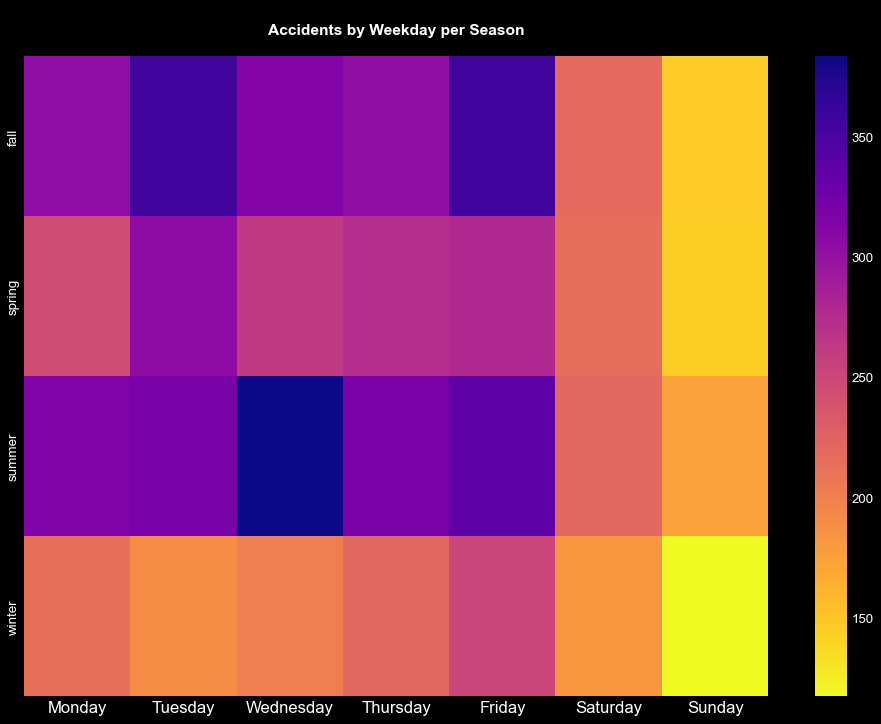

In [332]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df3.groupby(['season', 'dayofweek']).size()
accweekday = accweekday.rename_axis(['season', 'dayofweek'])\
                               .unstack('dayofweek')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Season\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdayperseason.png')
plt.show()

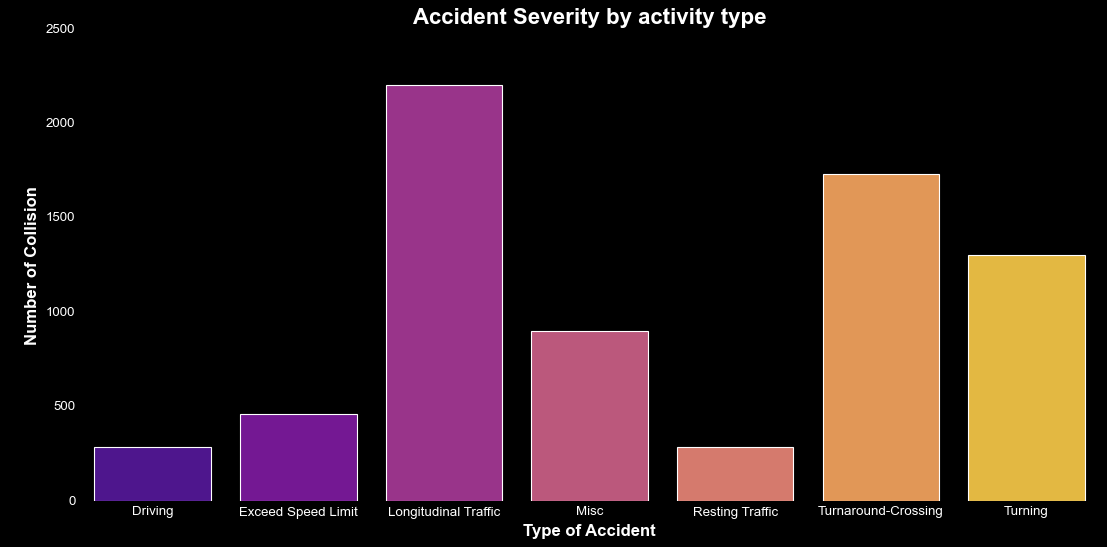

In [333]:
type_of_accident = df3.groupby(['typeoaccident'])['acccategory'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(14,7))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(type_of_accident.index, type_of_accident.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accident Severity by activity type",fontsize=20,fontweight="bold")
plt.xlabel("Type of Accident", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Collision", fontsize=15, fontweight="bold")
plt.savefig('accident_severity_by_type.png')
plt.tight_layout()

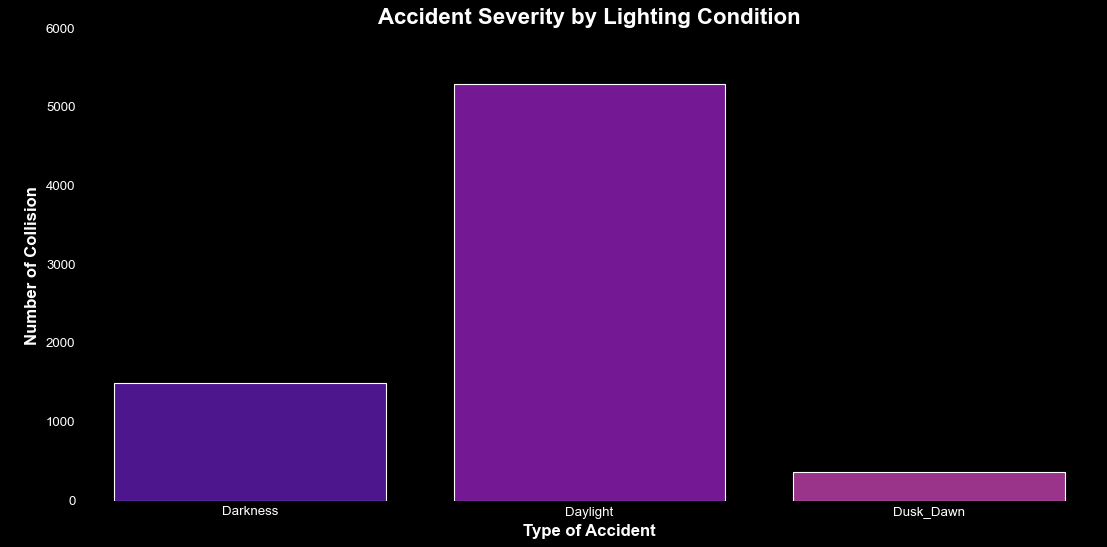

In [334]:
lighting_condition = df3.groupby(['lightingcond'])['acccategory'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(14,7))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(lighting_condition.index, lighting_condition.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accident Severity by Lighting Condition",fontsize=20,fontweight="bold")
plt.xlabel("Type of Accident", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Collision", fontsize=15, fontweight="bold")
plt.savefig('accident_severity_by_lighting.png')
plt.tight_layout()

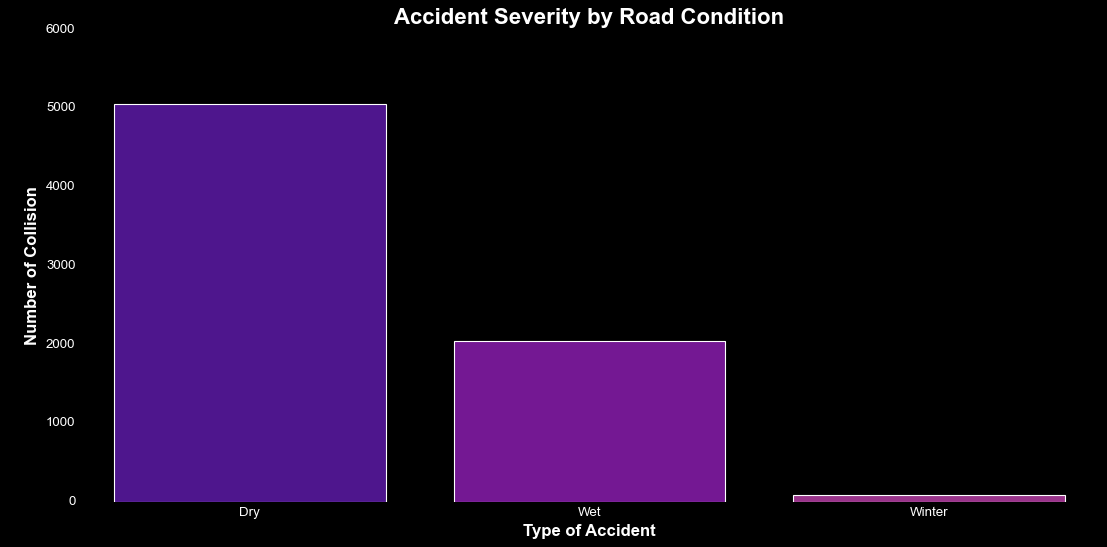

In [335]:
road_condition = df3.groupby(['roadcondition'])['acccategory'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(14,7))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(road_condition.index, road_condition.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accident Severity by Road Condition",fontsize=20,fontweight="bold")
plt.xlabel("Type of Accident", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Collision", fontsize=15, fontweight="bold")
plt.savefig('accident_severity_by_road_condition.png')
plt.tight_layout()

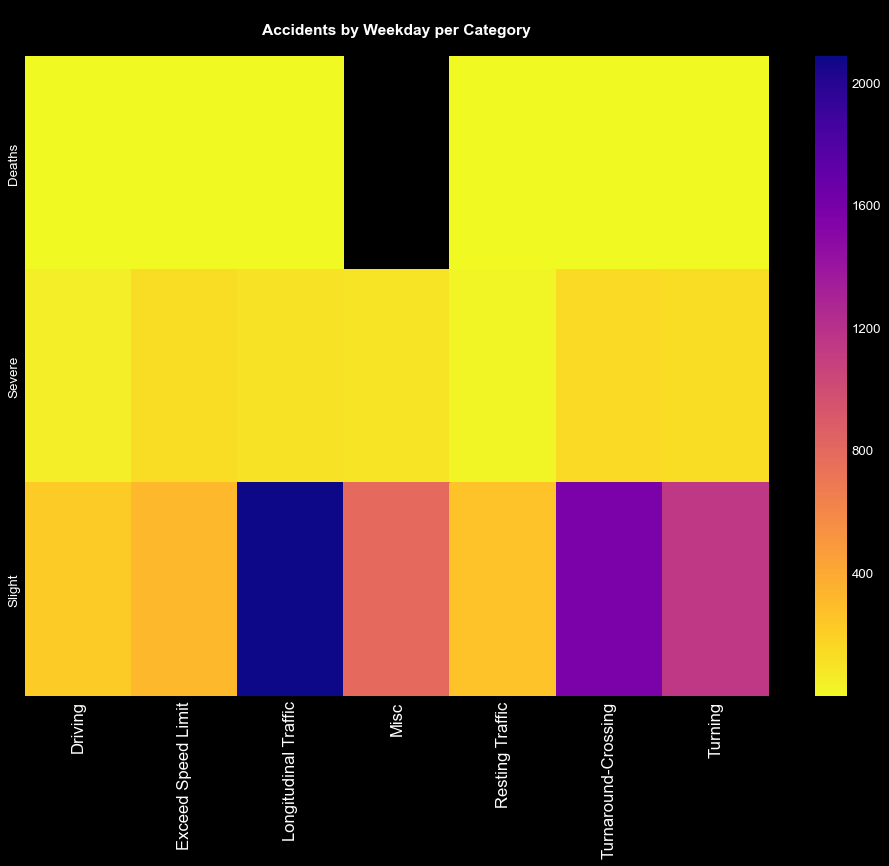

In [336]:
#toas = ['Driving', 'Exceed Spped Limit','Longitudinal','Miscellaneous', 'Resting Traffic', 'Turn Arround/Crossing', Turning']
accweekday = df3.groupby(['acccategory', 'typeoaccident']).size()
accweekday = accweekday.rename_axis(['acccategory', 'typeoaccident'])\
                               .unstack('typeoaccident')\
#                               .reindex(columns=toas)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Category\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdaypercategory.png')
plt.show()

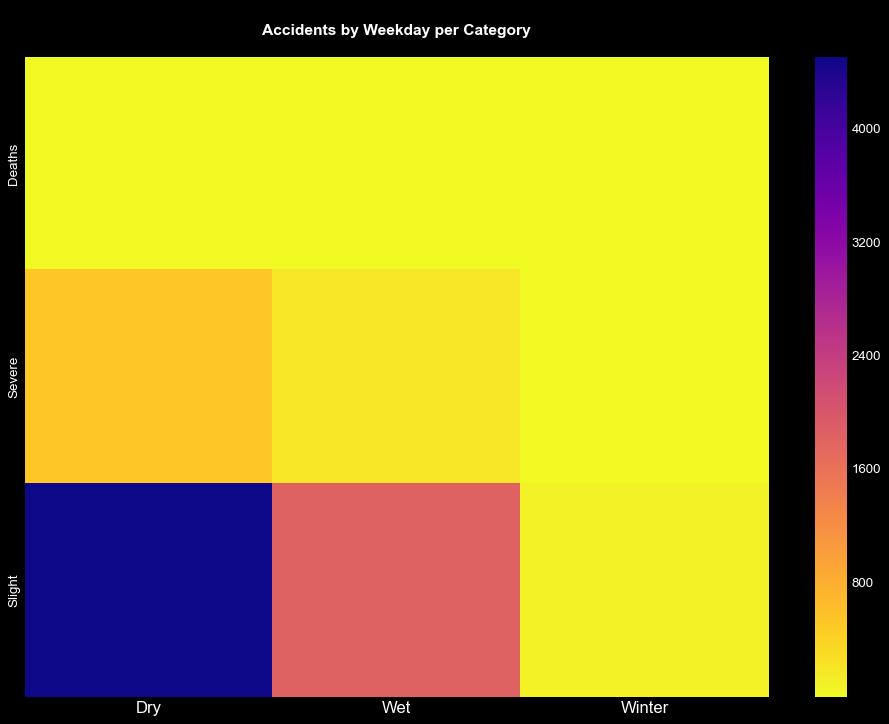

In [337]:
accweekday = df3.groupby(['acccategory', 'roadcondition']).size()
accweekday = accweekday.rename_axis(['acccategory', 'roadcondition'])\
                               .unstack('roadcondition')\
#                               .reindex(columns=toas)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Category\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdaypercategory.png')
plt.show()

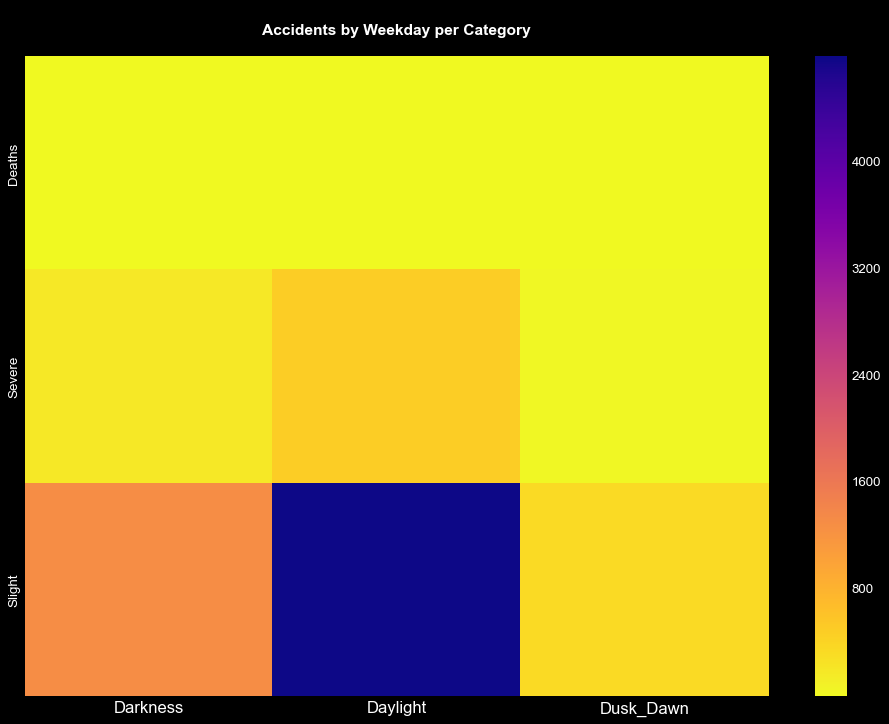

In [338]:
accweekday = df3.groupby(['acccategory', 'lightingcond']).size()
accweekday = accweekday.rename_axis(['acccategory', 'lightingcond'])\
                               .unstack('lightingcond')\
#                               .reindex(columns=toas)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Category\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('accidentsbyweekdaypercategory.png')
plt.show()

## Multivariate Analysis
___________

__*Correlations*__: 
For correlation I used both Pearson and Spearman just in case there would be discrepancies. The order may have slightly varied but the "highest" correlated remained the same.

                     level_0     index    admin2    admin3     month  \
level_0             1.000000  0.999999 -0.020596  0.050927  0.683929   
index               0.999999  1.000000 -0.020581  0.050974  0.683353   
admin2             -0.020596 -0.020581  1.000000 -0.000499 -0.023336   
admin3              0.050927  0.050974 -0.000499  1.000000  0.001283   
month               0.683929  0.683353 -0.023336  0.001283  1.000000   
bicycle             0.094243  0.094329 -0.094737 -0.014480  0.026595   
passengercar       -0.047882 -0.047913  0.013850  0.032100 -0.018744   
pedestrian          0.069057  0.069112 -0.043184 -0.020062  0.009649   
motorcycle/scooter  0.019218  0.019244  0.006778  0.002792 -0.004042   
hgv                -0.100981 -0.101079  0.085220 -0.033267 -0.011589   
otheraccidents      0.002614  0.002631  0.022013 -0.040117 -0.007051   

                     bicycle  passengercar  pedestrian  motorcycle/scooter  \
level_0             0.094243     -0.047882    0.069057   

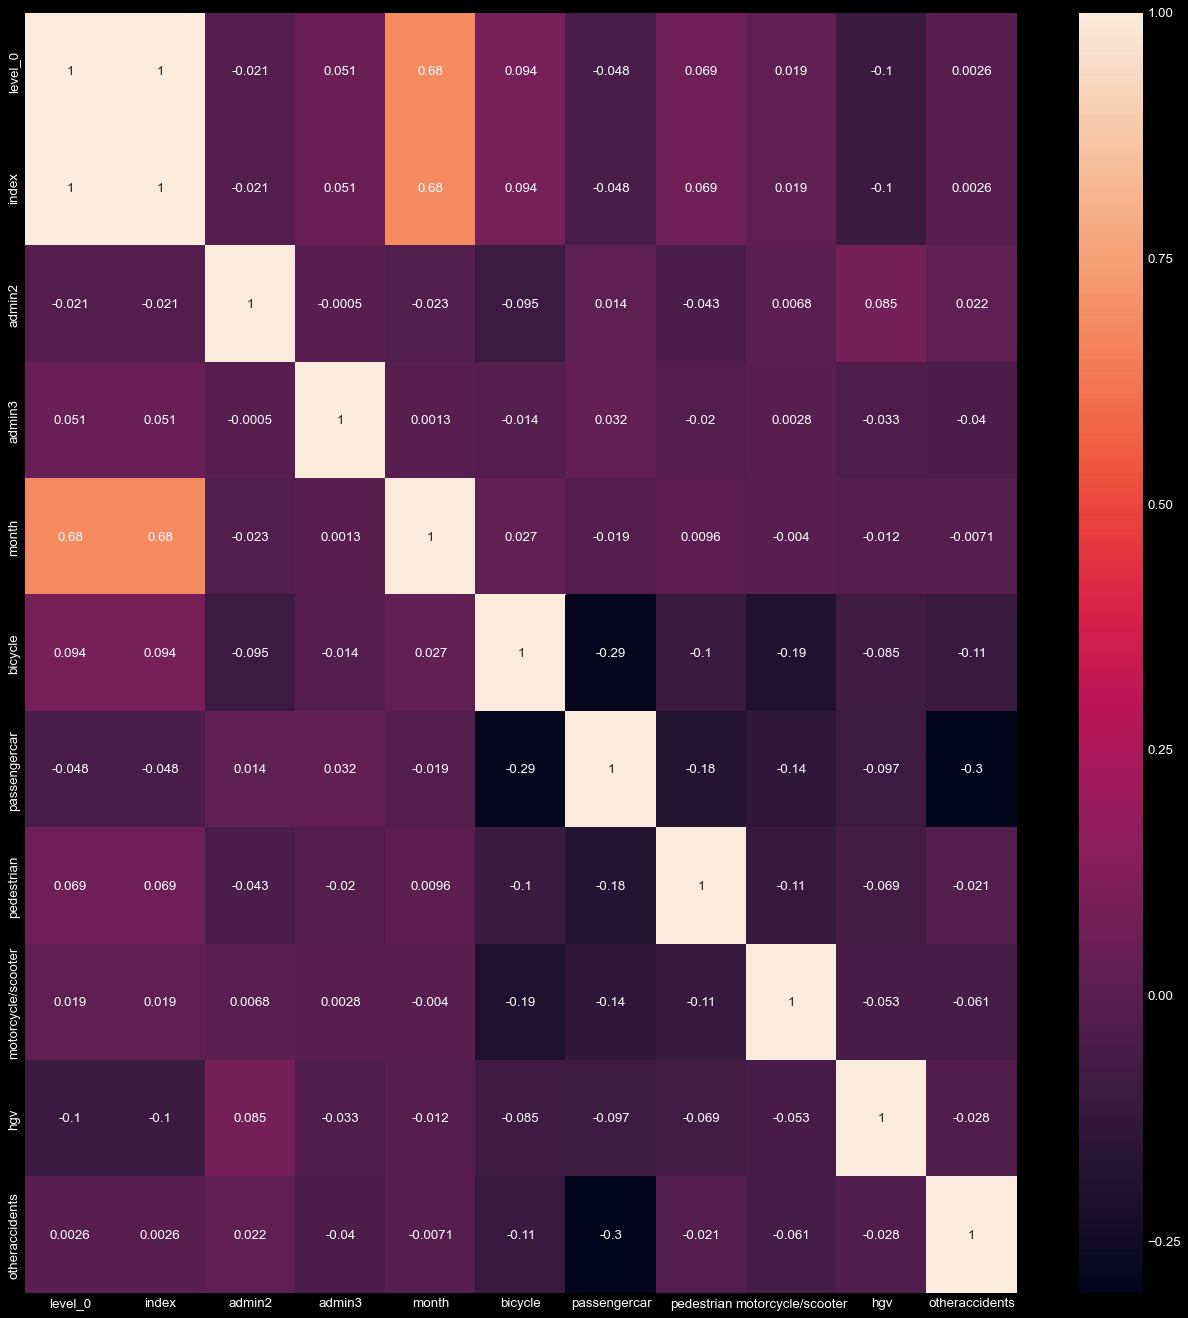

In [339]:
corrMatrix = df3.corr()
print (corrMatrix)
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [340]:
#correlation by accident category pearson
corrdf=df3.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=df3.columns)
corr=corrdf.corr()['acccategory']
corr[np.argsort(corr,axis=0)[::-1]]

acccategory           1.000000
passengercar          0.065194
lightingcond          0.048653
typeoaccident         0.045693
kindocollision        0.045589
otheraccidents        0.021258
bicycle               0.018155
roadcondition         0.012365
dayofweek            -0.000751
month                -0.011799
season               -0.012931
index                -0.013399
level_0              -0.013399
admin2               -0.029331
admin3               -0.030003
hgv                  -0.031555
motorcycle/scooter   -0.099876
pedestrian           -0.155903
accident_severity    -0.984034
Name: acccategory, dtype: float64

In [341]:
corr_spear=corrdf.corr(method='spearman')['acccategory']
corr_spear[np.argsort(corr_spear,axis=0)[::-1]]

acccategory           1.000000
passengercar          0.063323
lightingcond          0.048822
typeoaccident         0.046186
kindocollision        0.034977
otheraccidents        0.023124
bicycle               0.015119
roadcondition         0.011633
dayofweek             0.000757
month                -0.011008
season               -0.013158
index                -0.013802
level_0              -0.013802
hgv                  -0.022570
admin2               -0.023242
admin3               -0.033430
motorcycle/scooter   -0.095326
pedestrian           -0.160814
accident_severity    -0.999814
Name: acccategory, dtype: float64

In [342]:
#correlation by accident severity pearson
corrdf=df3.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=df3.columns)
corr=corrdf.corr()['accident_severity']
corr[np.argsort(corr,axis=0)[::-1]]

accident_severity     1.000000
pedestrian            0.161132
motorcycle/scooter    0.094609
admin3                0.032141
admin2                0.027168
hgv                   0.021440
index                 0.013827
level_0               0.013827
season                0.013344
month                 0.011634
dayofweek            -0.000950
roadcondition        -0.012557
bicycle              -0.014725
otheraccidents       -0.023311
kindocollision       -0.046080
lightingcond         -0.047983
typeoaccident        -0.048121
passengercar         -0.062986
acccategory          -0.984034
Name: accident_severity, dtype: float64

In [343]:
corr_spear=corrdf.corr(method='spearman')['accident_severity']
corr_spear[np.argsort(corr_spear,axis=0)[::-1]]

accident_severity     1.000000
pedestrian            0.161132
motorcycle/scooter    0.094609
admin3                0.033583
admin2                0.022931
hgv                   0.021440
index                 0.013827
level_0               0.013827
season                0.013183
month                 0.010958
dayofweek            -0.000942
roadcondition        -0.011579
bicycle              -0.014725
otheraccidents       -0.023311
kindocollision       -0.034915
typeoaccident        -0.046380
lightingcond         -0.048669
passengercar         -0.062986
acccategory          -0.999814
Name: accident_severity, dtype: float64

### _Chi-Squared Test_
***
Before these visualizations were done, I wanted to be sure that the visualizations were of some importance to accident_seriousness. For this, the chi-squared test was used.

In [344]:
temp = df2[['xgcswgs84','ygcswgs84']]
temp
df3_chi = pd.concat([df3, temp], axis = 'columns', sort = False)
df3_chi.set_index('level_0')

index  admin2  admin3  month  dayofweek acccategory  \
level_0                                                        
0           11       9     710      2  Wednesday      Slight   
1           12      19     140      4   Saturday      Slight   
2           13       9     610      1     Monday      Severe   
3           14       1     102      3   Saturday      Severe   
4           15       5     317      2     Sunday      Slight   
...        ...     ...     ...    ...        ...         ...   
7185      7206       1     701     12     Friday      Slight   
7186      7207      16     524     12     Friday      Slight   
7187      7208       8     320     12   Thursday      Slight   
7188      7209      16     136     12     Monday      Slight   
7189      7210      18     526     12   Thursday      Slight   

           kindocollision         typeoaccident lightingcond roadcondition  \
level_0                                                                      
0         Waiting Vehicle               Turning     Daylight           Dry   
1         Waiting Vehicle  Longitudinal Traffic     Daylight           Dry   
2              Pedestrian    Exceed Speed Limit     Daylight           Dry   
3         Waiting Vehicle  Longitudinal Traffic     Daylight           Dry   
4         Roadway to left               Driving     Darkness           Dry   
...                   ...                   ...          ...           ...   
7185               Others                  Misc     Daylight           Dry   
7186     Crossing Vehicle   Turnaround-Crossing    Dusk_Dawn           Wet   
7187      Waiting Vehicle  Longitudinal Traffic    Dusk_Dawn           Dry   
7188               Others                  Misc     Daylight           Dry   
7189     Crossing Vehicle   Turnaround-Crossing     Daylight           Dry   

         bicycle  passengercar  pedestrian  motorcycle/scooter  hgv  \
level_0                                                               
0              0             1           0                   1    0   
1              0             1           0                   0    0   
2              0             1           1                   0    0   
3              0             1           0                   1    0   
4              0             1           0                   0    0   
...          ...           ...         ...                 ...  ...   
7185           0             1           1                   0    0   
7186           1             1           0                   0    0   
7187           0             1           0                   0    0   
7188           1             0           0                   0    0   
7189           0             1           0                   0    0   

         otheraccidents  season accident_severity  xgcswgs84  ygcswgs84  
level_0                                                                  
0                     0  winter       Not Serious   9.967263  53.450086  
1                     1  spring       Not Serious   9.921465  53.518014  
2                     0  winter           Serious  10.135767  53.483877  
3                     1  spring           Serious   9.993790  53.547323  
4                     0  winter       Not Serious   9.963099  53.600736  
...                 ...     ...               ...        ...        ...  
7185                  0  winter       Not Serious   9.978172  53.458331  
7186                  0  winter       Not Serious  10.134735  53.670281  
7187                  0  winter       Not Serious   9.908848  53.610363  
7188                  1  winter       Not Serious  10.014119  53.518401  
7189                  0  winter       Not Serious  10.178387  53.590645  

[7190 rows x 20 columns]

In [345]:
"""chisquare algorithm from 
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python """

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df3_chi)

#Feature Selection
testColumns = ['month', 'dayofweek', 'acccategory', 'kindocollision', 'typeoaccident', 'lightingcond', 
               'roadcondition', 'bicycle', 'passengercar', 'pedestrian', 'motorcycle/scooter', 'hgv', 
               'otheraccidents', 'season', 'xgcswgs84', 'ygcswgs84']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="accident_severity" ) 

The column month is NOT an important predictor. (Discard month from model)
The column dayofweek is NOT an important predictor. (Discard dayofweek from model)
The column acccategory is IMPORTANT for Prediction
The column kindocollision is IMPORTANT for Prediction
The column typeoaccident is IMPORTANT for Prediction
The column lightingcond is IMPORTANT for Prediction
The column roadcondition is NOT an important predictor. (Discard roadcondition from model)
The column bicycle is NOT an important predictor. (Discard bicycle from model)
The column passengercar is IMPORTANT for Prediction
The column pedestrian is IMPORTANT for Prediction
The column motorcycle/scooter is IMPORTANT for Prediction
The column hgv is NOT an important predictor. (Discard hgv from model)
The column otheraccidents is NOT an important predictor. (Discard otheraccidents from model)
The column season is NOT an important predictor. (Discard season from model)
The column xgcswgs84 is NOT an important predictor. (Discard 

In [346]:
"""chisquare algorithm from 
http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python """

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="The column {0} is IMPORTANT for Prediction".format(colX)
        else:
            result="The column {0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, 
                                       index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(df3_chi)

#Feature Selection
testColumns = ['month', 'dayofweek', 'kindocollision', 'typeoaccident', 'lightingcond', 
               'roadcondition', 'bicycle', 'passengercar', 'pedestrian', 'motorcycle/scooter', 'hgv', 
               'otheraccidents', 'season', 'xgcswgs84', 'ygcswgs84']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="acccategory") 

The column month is NOT an important predictor. (Discard month from model)
The column dayofweek is NOT an important predictor. (Discard dayofweek from model)
The column kindocollision is IMPORTANT for Prediction
The column typeoaccident is IMPORTANT for Prediction
The column lightingcond is IMPORTANT for Prediction
The column roadcondition is NOT an important predictor. (Discard roadcondition from model)
The column bicycle is NOT an important predictor. (Discard bicycle from model)
The column passengercar is IMPORTANT for Prediction
The column pedestrian is IMPORTANT for Prediction
The column motorcycle/scooter is IMPORTANT for Prediction
The column hgv is IMPORTANT for Prediction
The column otheraccidents is NOT an important predictor. (Discard otheraccidents from model)
The column season is NOT an important predictor. (Discard season from model)
The column xgcswgs84 is NOT an important predictor. (Discard xgcswgs84 from model)
The column ygcswgs84 is NOT an important predictor. (Disc

### Visualizations In Relation to Accident Seriousness

#### Method:
For my visualizations I have decided to use some of the features with the highest correlations to accident_seriousness:

```
* kind_of_collision 
* type_of_accident 
* lighting_condition 
* passenger_car
* pedestrian     
* motorcycle/scooter  
* road_condition *
* bicycle *
* hgv *
* season *
* month *
```
***
Note: The columns used were selected because of the absolute value of their correlation in relation to accident_seriousness

*Columns added after correlation was done after undersampling...*

For visual reasons, two separate dataframes were created, for not serious and serious accidents. I wanted to better scale the data and for me, this was the simplest way of doing so.

In [347]:
# dataframe where accidents are Slight
not_serious = df3[(df3['accident_severity']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_severity.value_counts()

Not Serious Group Shape: (6447, 19)


Not Serious    6447
Name: accident_severity, dtype: int64

In [348]:
#dataframe where accidents are serious
serious= df3[(df3['accident_severity']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_severity.value_counts()

Serious Group Shape: (743, 19)


Serious    743
Name: accident_severity, dtype: int64

In [349]:
#setups for adding frequencies to visualizations
dftotal= float(len(df3))
nstotal= float(len(not_serious))
setotal= float(len(serious))

### Kind of Collision
----
The below plots show the counts for the kinds of collision causing accident severity.

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



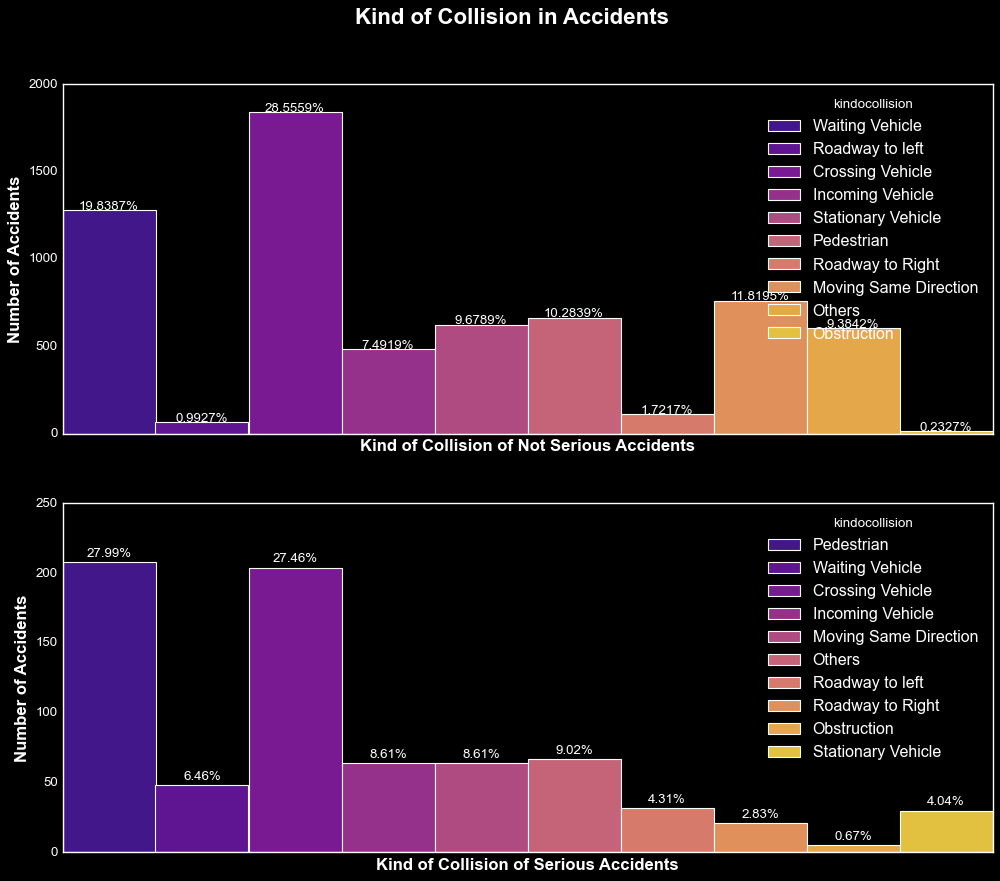

In [350]:
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot('accident_severity', hue='kindocollision',
              palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot('accident_severity', hue='kindocollision',
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Kind of Collision in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Kind of Collision of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Kind of Collision of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.style.use('dark_background')
plt.savefig('Kind of Collision.png')
fig.show()

#### Accident Type vs Severity
_______
The below graphs shows what type of accident have the highest severity (consequence).

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



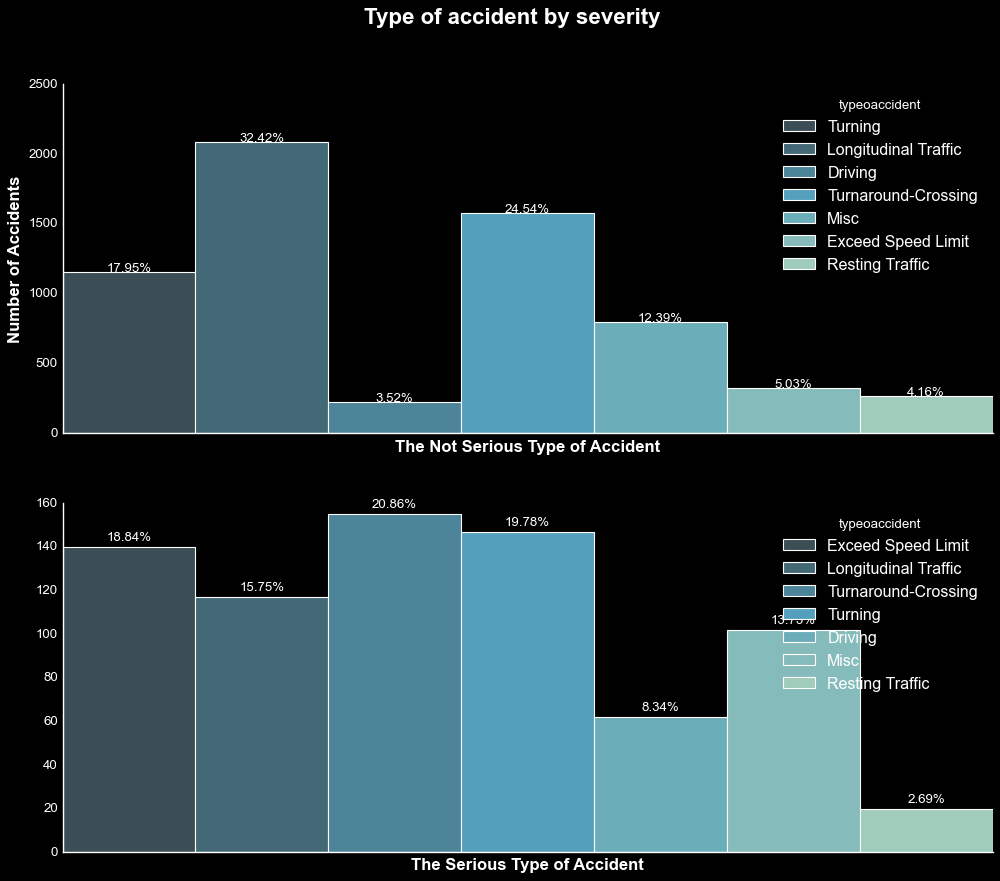

In [351]:
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_severity", hue="typeoaccident",
              palette="GnBu_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_severity", hue="typeoaccident", 
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Type of accident by severity", fontsize=20, fontweight="bold")
ax1.set_xlabel('The Not Serious Type of Accident', fontsize=15, fontweight="bold")
ax2.set_xlabel('The Serious Type of Accident', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('type of accident_severity.png')
fig.show()

### Vehicle Leaving Carriageway vs Seriousness
****
The below graphs shows the lighting condition, and the associated accident seriousness.

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



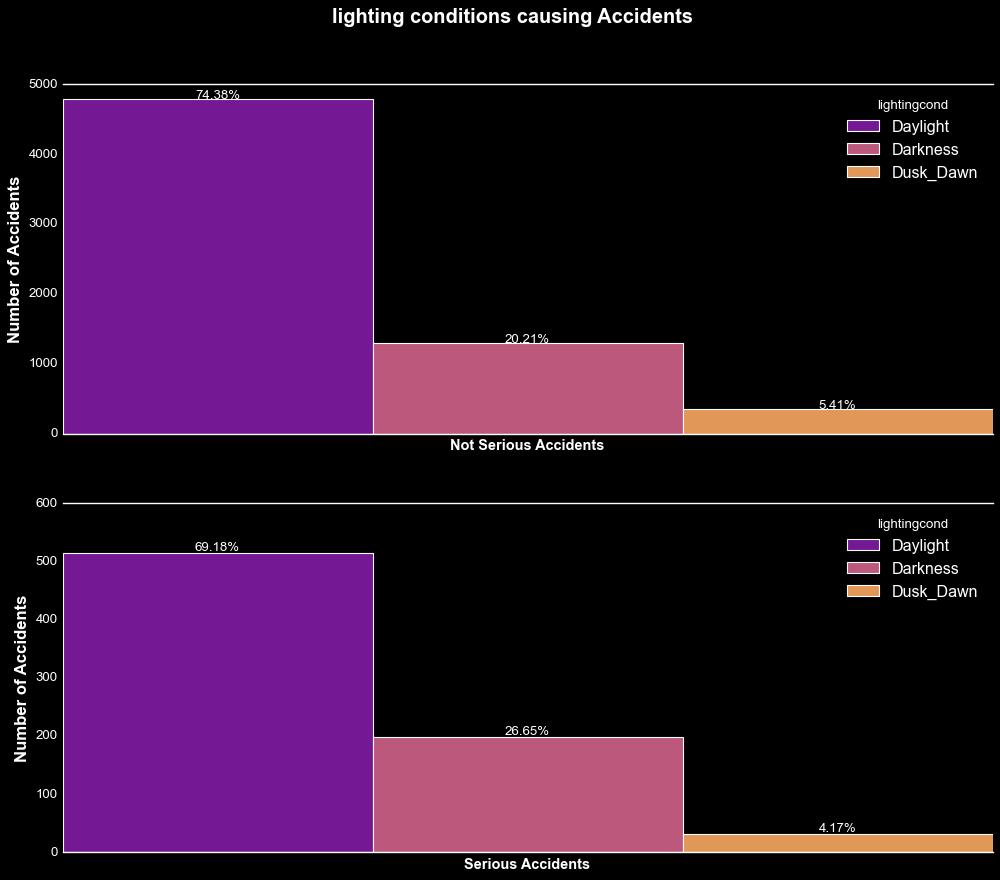

In [352]:
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_severity", hue="lightingcond",
                   palette="plasma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_severity", hue="lightingcond",
              palette="plasma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("lighting conditions causing Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.style.use('dark_background')
plt.savefig('lighting_condition_accidents.png')
fig.show()

#### How severe are vehicles with/without passengers affected?
----
The below plots will look into passengers in vehicles involved in accident.

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



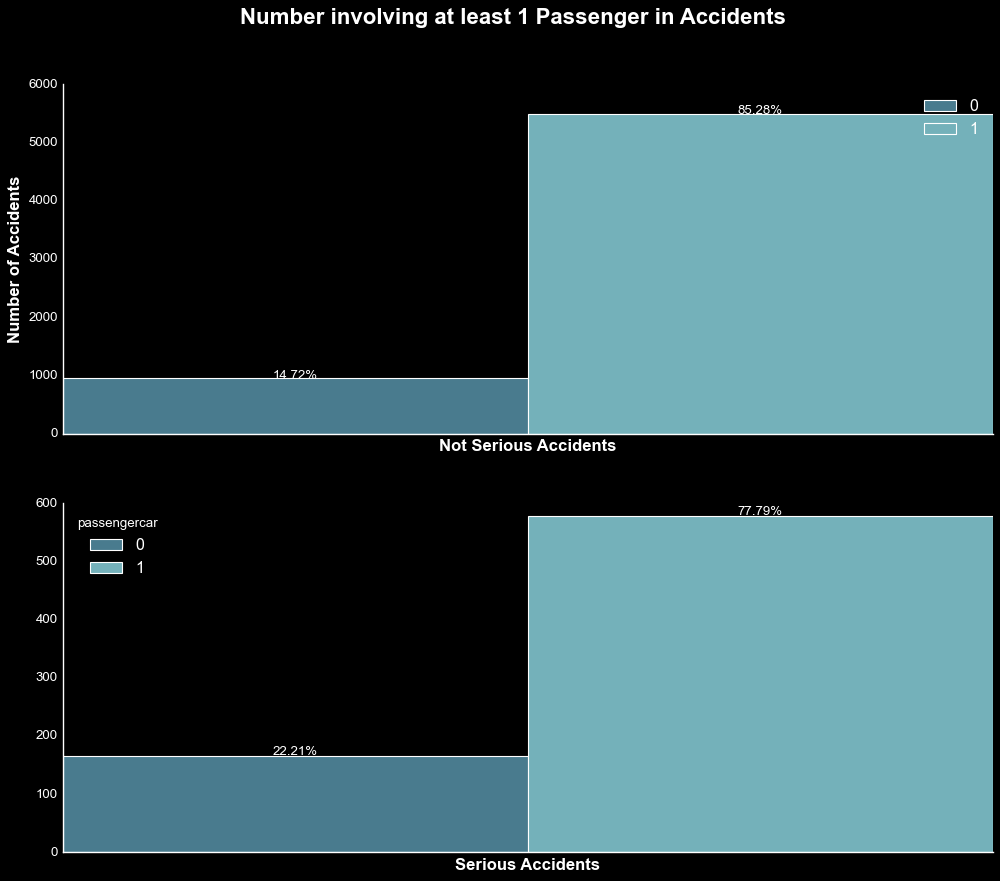

In [353]:
passengercar = ["With Passengers", "Without Passengers"]

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_severity", hue="passengercar",
              palette="GnBu_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_severity", hue="passengercar",
              palette="GnBu_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Number involving at least 1 Passenger in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
ax1.legend()
plt.style.use('dark_background')
plt.savefig('number_of_passenger_car.png')
fig.show()

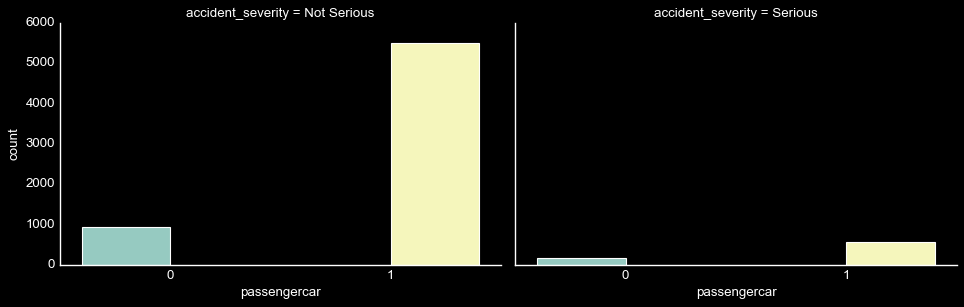

In [354]:
g = sns.catplot(x="passengercar", hue="passengercar", col="accident_severity",
                data=df3, kind="count",
                height=4, aspect=1.5);

#### Passenger Car
_____________
What is the number of pedestrian involved in an accident?

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



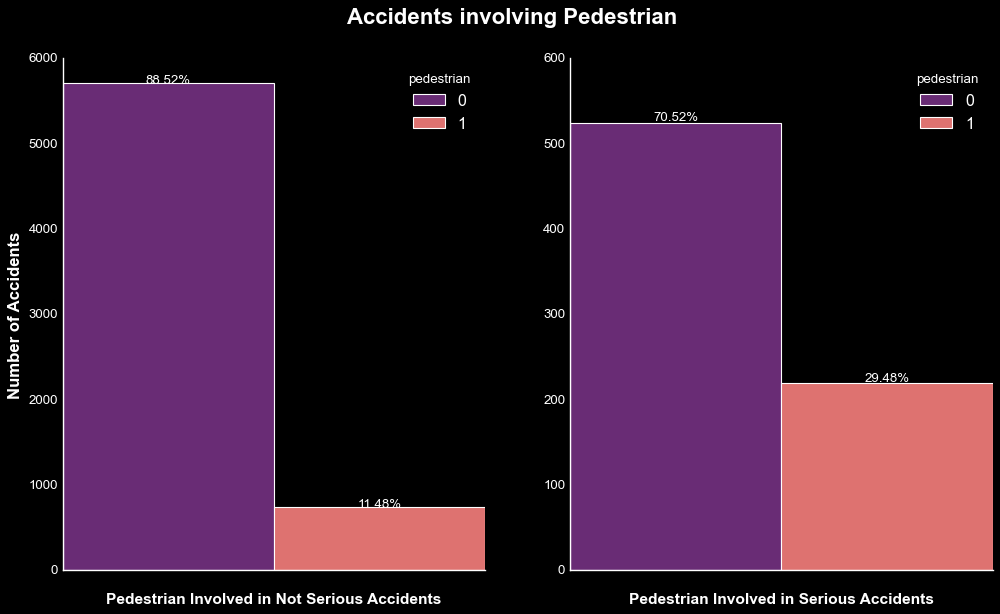

In [355]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_severity", hue="pedestrian",
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_severity", hue="pedestrian",
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Accidents involving Pedestrian", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nPedestrian Involved in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nPedestrian Involved in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('pedestrian_involved.png')
fig.show()

#### Motorcycle/Scooter
****

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



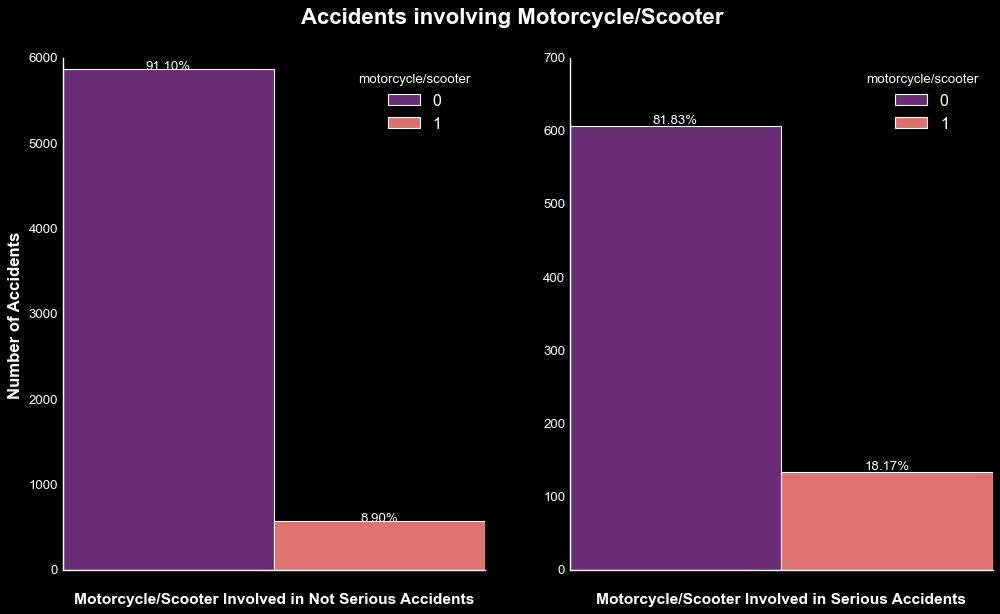

In [356]:
fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_severity", hue="motorcycle/scooter",
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_severity", hue="motorcycle/scooter",
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Accidents involving Motorcycle/Scooter", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nMotorcycle/Scooter Involved in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nMotorcycle/Scooter Involved in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('Motorcycle_Scooter.png')
fig.show()

### Heavy Good Vehicle, Heavy Duty and Special Suprstructure
-----

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\emeka\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



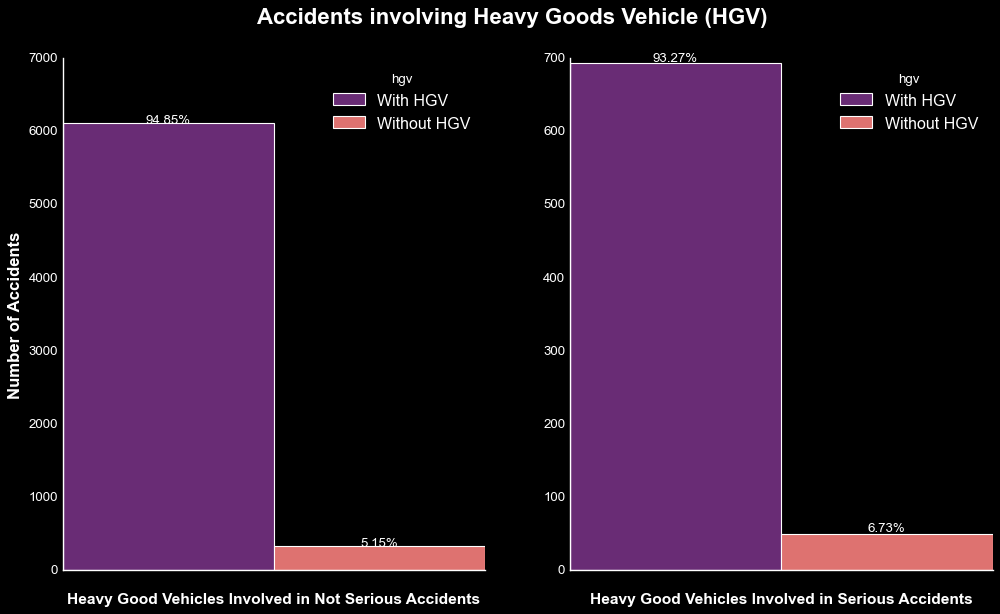

In [357]:
sub = {0: "With HGV", 1:"Without HGV"}

not_serious['hgv']=not_serious['hgv'].map(sub)
df3['hgv']=df3['hgv'].map(sub)
serious['hgv']=serious['hgv'].map(sub)

fig, ax =plt.subplots(1,2,figsize = (15,8))
sns.despine(top=True, right=True, left=False, bottom=False)
ax1 =sns.countplot("accident_severity", hue="hgv",
              palette="magma", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 = sns.countplot("accident_severity", hue="hgv",
              palette="magma", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Accidents involving Heavy Goods Vehicle (HGV)", fontsize=20, fontweight="bold")
ax1.set_xlabel('\nHeavy Good Vehicles Involved in Not Serious Accidents', fontsize=14, fontweight="bold")
ax2.set_xlabel('\nHeavy Good Vehicles Involved in Serious Accidents', fontsize=14, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('')
plt.style.use('dark_background')
plt.savefig('Heavy Good Vehicles.png')
fig.show()

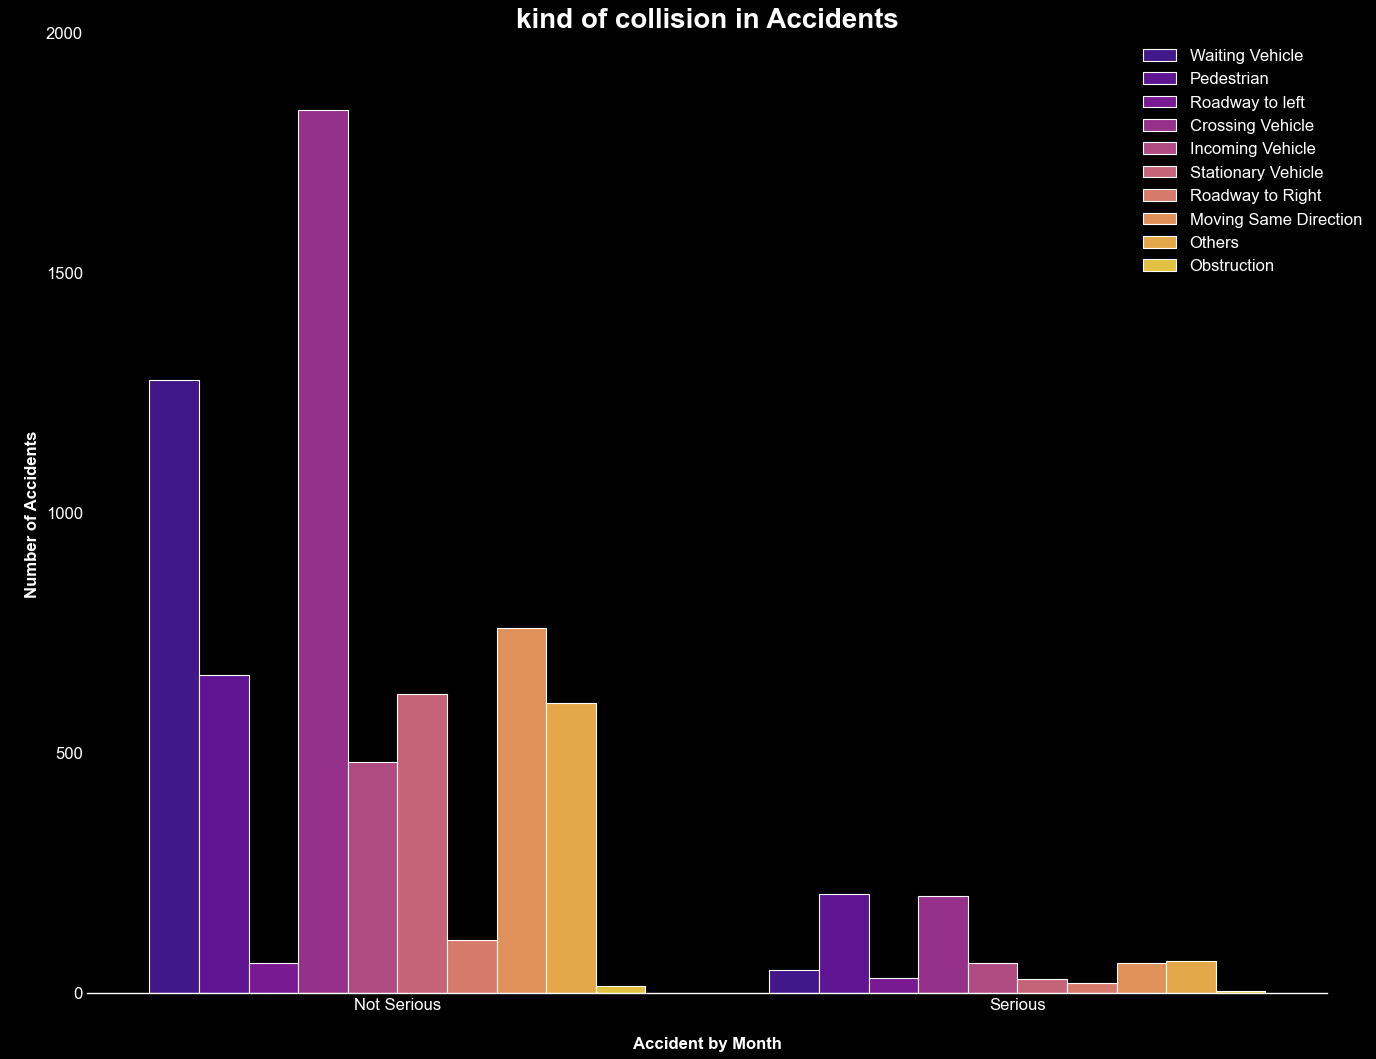

In [358]:
plt.figure(figsize=(20,15))
ax=sns.countplot("accident_severity", hue="kindocollision",
              palette="plasma", data=df3)

plt.style.use('dark_background')
plt.title("kind of collision in Accidents",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Month", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('collision kind.png')
plt.show()

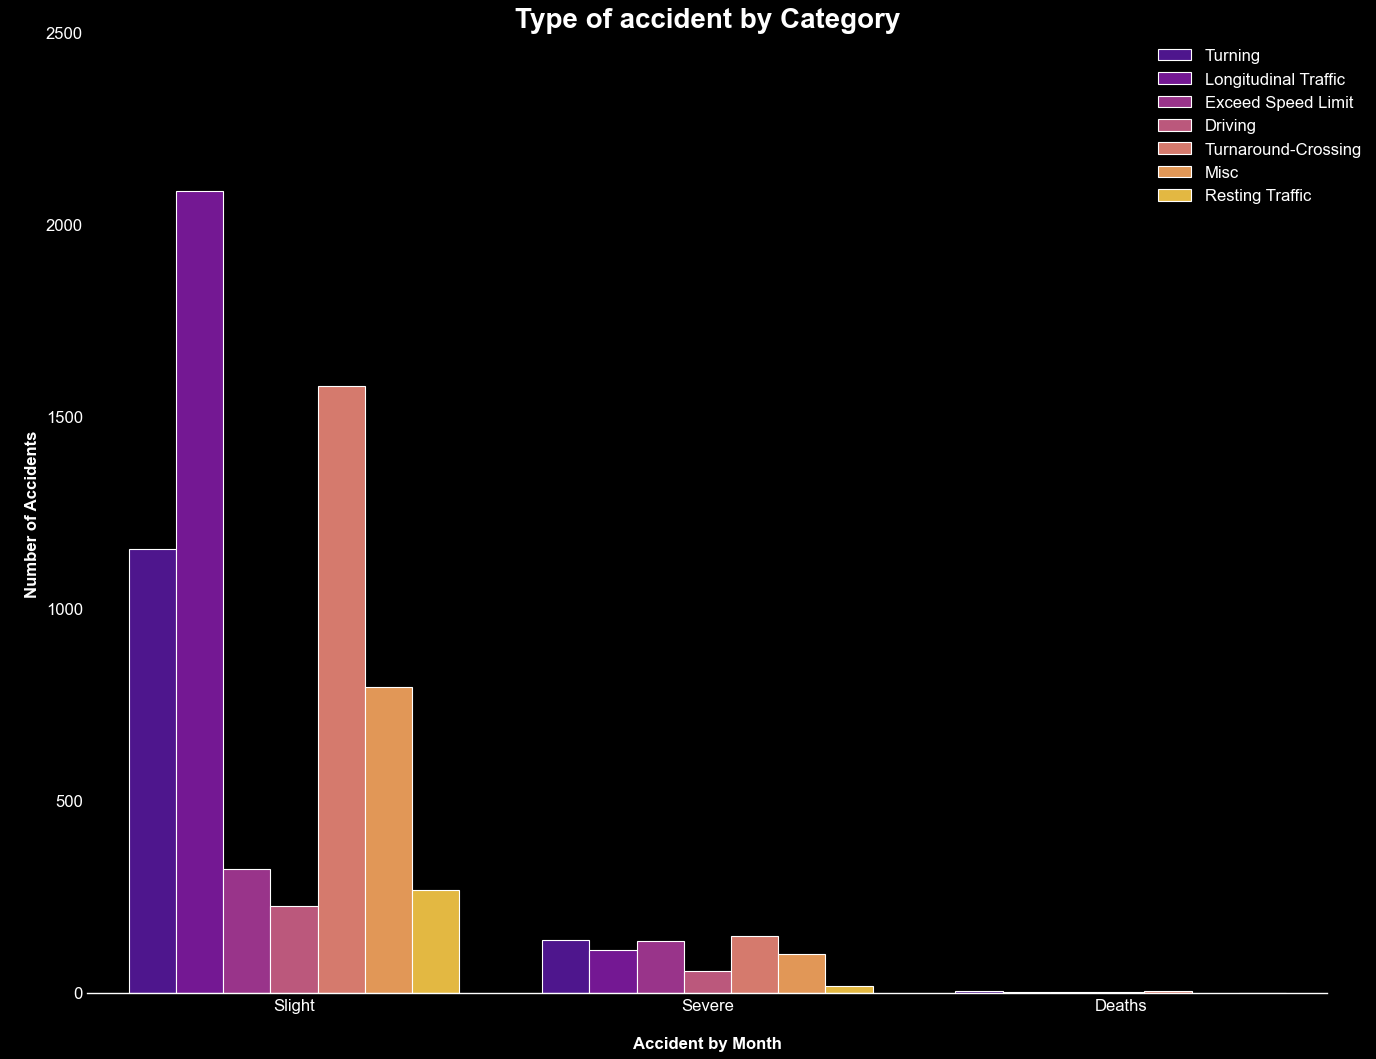

In [359]:
plt.figure(figsize=(20,15))
ax=sns.countplot("acccategory", hue="typeoaccident",
              palette="plasma", data=df3)

plt.style.use('dark_background')
plt.title("Type of accident by Category",fontsize=25,fontweight="bold")
plt.xlabel("\nAccident by Month", fontsize=15, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='22', loc = 'upper right')
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize='15', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('type_of_accident_by_category.png')
plt.show()

In [360]:
df3

level_0  index  admin2  admin3  month  dayofweek acccategory  \
0           0     11       9     710      2  Wednesday      Slight   
1           1     12      19     140      4   Saturday      Slight   
2           2     13       9     610      1     Monday      Severe   
3           3     14       1     102      3   Saturday      Severe   
4           4     15       5     317      2     Sunday      Slight   
...       ...    ...     ...     ...    ...        ...         ...   
7185     7185   7206       1     701     12     Friday      Slight   
7186     7186   7207      16     524     12     Friday      Slight   
7187     7187   7208       8     320     12   Thursday      Slight   
7188     7188   7209      16     136     12     Monday      Slight   
7189     7189   7210      18     526     12   Thursday      Slight   

        kindocollision         typeoaccident lightingcond roadcondition  \
0      Waiting Vehicle               Turning     Daylight           Dry   
1      Waiting Vehicle  Longitudinal Traffic     Daylight           Dry   
2           Pedestrian    Exceed Speed Limit     Daylight           Dry   
3      Waiting Vehicle  Longitudinal Traffic     Daylight           Dry   
4      Roadway to left               Driving     Darkness           Dry   
...                ...                   ...          ...           ...   
7185            Others                  Misc     Daylight           Dry   
7186  Crossing Vehicle   Turnaround-Crossing    Dusk_Dawn           Wet   
7187   Waiting Vehicle  Longitudinal Traffic    Dusk_Dawn           Dry   
7188            Others                  Misc     Daylight           Dry   
7189  Crossing Vehicle   Turnaround-Crossing     Daylight           Dry   

      bicycle  passengercar  pedestrian  motorcycle/scooter       hgv  \
0           0             1           0                   1  With HGV   
1           0             1           0                   0  With HGV   
2           0             1           1                   0  With HGV   
3           0             1           0                   1  With HGV   
4           0             1           0                   0  With HGV   
...       ...           ...         ...                 ...       ...   
7185        0             1           1                   0  With HGV   
7186        1             1           0                   0  With HGV   
7187        0             1           0                   0  With HGV   
7188        1             0           0                   0  With HGV   
7189        0             1           0                   0  With HGV   

      otheraccidents  season accident_severity  
0                  0  winter       Not Serious  
1                  1  spring       Not Serious  
2                  0  winter           Serious  
3                  1  spring           Serious  
4                  0  winter       Not Serious  
...              ...     ...               ...  
7185               0  winter       Not Serious  
7186               0  winter       Not Serious  
7187               0  winter       Not Serious  
7188               1  winter       Not Serious  
7189               0  winter       Not Serious  

[7190 rows x 19 columns]

## Data Mining
__________________

In [361]:
#made separate dataframe w. set index that wouldnt effect data vis above
df5=df3
#set index to accident_index
df5.set_index('level_0', inplace=True)
df5.head()

index  admin2  admin3  month  dayofweek acccategory   kindocollision  \
level_0                                                                         
0           11       9     710      2  Wednesday      Slight  Waiting Vehicle   
1           12      19     140      4   Saturday      Slight  Waiting Vehicle   
2           13       9     610      1     Monday      Severe       Pedestrian   
3           14       1     102      3   Saturday      Severe  Waiting Vehicle   
4           15       5     317      2     Sunday      Slight  Roadway to left   

                typeoaccident lightingcond roadcondition  bicycle  \
level_0                                                             
0                     Turning     Daylight           Dry        0   
1        Longitudinal Traffic     Daylight           Dry        0   
2          Exceed Speed Limit     Daylight           Dry        0   
3        Longitudinal Traffic     Daylight           Dry        0   
4                     Driving     Darkness           Dry        0   

         passengercar  pedestrian  motorcycle/scooter       hgv  \
level_0                                                           
0                   1           0                   1  With HGV   
1                   1           0                   0  With HGV   
2                   1           1                   0  With HGV   
3                   1           0                   1  With HGV   
4                   1           0                   0  With HGV   

         otheraccidents  season accident_severity  
level_0                                            
0                     0  winter       Not Serious  
1                     1  spring       Not Serious  
2                     0  winter           Serious  
3                     1  spring           Serious  
4                     0  winter       Not Serious

In [362]:
# xgcswgs84, ygcswgs84
df5 = df5.drop(['acccategory', 'index', 'admin2'],axis=1)

In [363]:
df5.head()

admin3  month  dayofweek   kindocollision         typeoaccident  \
level_0                                                                    
0           710      2  Wednesday  Waiting Vehicle               Turning   
1           140      4   Saturday  Waiting Vehicle  Longitudinal Traffic   
2           610      1     Monday       Pedestrian    Exceed Speed Limit   
3           102      3   Saturday  Waiting Vehicle  Longitudinal Traffic   
4           317      2     Sunday  Roadway to left               Driving   

        lightingcond roadcondition  bicycle  passengercar  pedestrian  \
level_0                                                                 
0           Daylight           Dry        0             1           0   
1           Daylight           Dry        0             1           0   
2           Daylight           Dry        0             1           1   
3           Daylight           Dry        0             1           0   
4           Darkness           Dry        0             1           0   

         motorcycle/scooter       hgv  otheraccidents  season  \
level_0                                                         
0                         1  With HGV               0  winter   
1                         0  With HGV               1  spring   
2                         0  With HGV               0  winter   
3                         1  With HGV               1  spring   
4                         0  With HGV               0  winter   

        accident_severity  
level_0                    
0             Not Serious  
1             Not Serious  
2                 Serious  
3                 Serious  
4             Not Serious

In [364]:
print(df5.columns)

Index(['admin3', 'month', 'dayofweek', 'kindocollision', 'typeoaccident',
       'lightingcond', 'roadcondition', 'bicycle', 'passengercar',
       'pedestrian', 'motorcycle/scooter', 'hgv', 'otheraccidents', 'season',
       'accident_severity'],
      dtype='object')


## Exploratory Spatial Data Analysis
___________
####  *Creating a GeoDataFrame from the dataframe*

In [404]:
temp = df2[['xgcswgs84','ygcswgs84']]
temp
df6 = pd.concat([df3, temp], axis = 'columns', sort = False)
#set index to accident_index
#df6.set_index('level_0', inplace=True)
df6 = df6.drop(['index'],axis=1)

In [367]:
#temp1 = df

In [368]:
# create new column for prediction and Visualization with Not Serious and Serious
df2['accident_severity'] = df2['acccategory']
df2['accident_severity'] = df2['accident_severity'].replace(to_replace=3, 
                                                                value=0)
df2['accident_severity'] = df2['accident_severity'].replace(to_replace=2,
                                                                value=1)
df2['accident_severity'] = df2['accident_severity'].replace(to_replace=1, 
                                                                value=1)
df2

index  admin2  admin3  month  dayofweek  acccategory  kindocollision  \
0        11       9     710      2          4            3               2   
1        12      19     140      4          7            3               2   
2        13       9     610      1          2            2               6   
3        14       1     102      3          7            2               2   
4        15       5     317      2          1            3               9   
...     ...     ...     ...    ...        ...          ...             ...   
7185   7206       1     701     12          6            3               0   
7186   7207      16     524     12          6            3               5   
7187   7208       8     320     12          5            3               2   
7188   7209      16     136     12          2            3               0   
7189   7210      18     526     12          5            3               5   

      typeoaccident  lightingcond  roadcondition  bicycle  passengercar  \
0                 2             0              0        0             1   
1                 6             0              0        0             1   
2                 4             0              0        0             1   
3                 6             0              0        0             1   
4                 1             2              0        0             1   
...             ...           ...            ...      ...           ...   
7185              7             0              0        0             1   
7186              3             1              1        1             1   
7187              6             1              0        0             1   
7188              7             0              0        1             0   
7189              3             0              0        0             1   

      pedestrian  motorcycle/scooter  hgv  otheraccidents  xgcswgs84  \
0              0                   1    0               0   9.967263   
1              0                   0    0               1   9.921465   
2              1                   0    0               0  10.135767   
3              0                   1    0               1   9.993790   
4              0                   0    0               0   9.963099   
...          ...                 ...  ...             ...        ...   
7185           1                   0    0               0   9.978172   
7186           0                   0    0               0  10.134735   
7187           0                   0    0               0   9.908848   
7188           0                   0    0               1  10.014119   
7189           0                   0    0               0  10.178387   

      ygcswgs84  accident_severity  
0     53.450086                  0  
1     53.518014                  0  
2     53.483877                  1  
3     53.547323                  1  
4     53.600736                  0  
...         ...                ...  
7185  53.458331                  0  
7186  53.670281                  0  
7187  53.610363                  0  
7188  53.518401                  0  
7189  53.590645                  0  

[7190 rows x 19 columns]

In [406]:
df7 = df2

In [370]:
geodf1 = gpd.GeoDataFrame(
    df6, geometry=gpd.points_from_xy(df6.xgcswgs84, df6.ygcswgs84))

In [372]:
crs = {'init': 'epsg:4326'}
geodf2 = gpd.GeoDataFrame(
    df7, crs=crs,geometry=gpd.points_from_xy(df7.xgcswgs84, df7.ygcswgs84))

In [374]:
# Creating a dataframe with numerical outcome//Severity//
temp2 = df7[['accident_severity']]
temp2.rename(columns={'accident_severity':'accseverity_binom'}, 
                 inplace=True)
temp2
df8 = pd.concat([df6, temp2], axis = 'columns', sort = False)
df8

C:\Users\emeka\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



admin2  admin3  month  dayofweek acccategory    kindocollision  \
0          9     710      2  Wednesday      Slight   Waiting Vehicle   
1         19     140      4   Saturday      Slight   Waiting Vehicle   
2          9     610      1     Monday      Severe        Pedestrian   
3          1     102      3   Saturday      Severe   Waiting Vehicle   
4          5     317      2     Sunday      Slight   Roadway to left   
...      ...     ...    ...        ...         ...               ...   
7185       1     701     12     Friday      Slight            Others   
7186      16     524     12     Friday      Slight  Crossing Vehicle   
7187       8     320     12   Thursday      Slight   Waiting Vehicle   
7188      16     136     12     Monday      Slight            Others   
7189      18     526     12   Thursday      Slight  Crossing Vehicle   

             typeoaccident lightingcond roadcondition  bicycle  ...  \
0                  Turning     Daylight           Dry        0  ...   
1     Longitudinal Traffic     Daylight           Dry        0  ...   
2       Exceed Speed Limit     Daylight           Dry        0  ...   
3     Longitudinal Traffic     Daylight           Dry        0  ...   
4                  Driving     Darkness           Dry        0  ...   
...                    ...          ...           ...      ...  ...   
7185                  Misc     Daylight           Dry        0  ...   
7186   Turnaround-Crossing    Dusk_Dawn           Wet        1  ...   
7187  Longitudinal Traffic    Dusk_Dawn           Dry        0  ...   
7188                  Misc     Daylight           Dry        1  ...   
7189   Turnaround-Crossing     Daylight           Dry        0  ...   

      pedestrian  motorcycle/scooter       hgv otheraccidents  season  \
0              0                   1  With HGV              0  winter   
1              0                   0  With HGV              1  spring   
2              1                   0  With HGV              0  winter   
3              0                   1  With HGV              1  spring   
4              0                   0  With HGV              0  winter   
...          ...                 ...       ...            ...     ...   
7185           1                   0  With HGV              0  winter   
7186           0                   0  With HGV              0  winter   
7187           0                   0  With HGV              0  winter   
7188           0                   0  With HGV              1  winter   
7189           0                   0  With HGV              0  winter   

     accident_severity  xgcswgs84  ygcswgs84                   geometry  \
0          Not Serious   9.967263  53.450086   POINT (9.96726 53.45009)   
1          Not Serious   9.921465  53.518014   POINT (9.92146 53.51801)   
2              Serious  10.135767  53.483877  POINT (10.13577 53.48388)   
3              Serious   9.993790  53.547323   POINT (9.99379 53.54732)   
4          Not Serious   9.963099  53.600736   POINT (9.96310 53.60074)   
...                ...        ...        ...                        ...   
7185       Not Serious   9.978172  53.458331   POINT (9.97817 53.45833)   
7186       Not Serious  10.134735  53.670281  POINT (10.13474 53.67028)   
7187       Not Serious   9.908848  53.610363   POINT (9.90885 53.61036)   
7188       Not Serious  10.014119  53.518401  POINT (10.01412 53.51840)   
7189       Not Serious  10.178387  53.590645  POINT (10.17839 53.59064)   

     accseverity_binom  
0                    0  
1                    0  
2                    1  
3                    1  
4                    0  
...                ...  
7185                 0  
7186                 0  
7187                 0  
7188                 0  
7189                 0  

[7190 rows x 21 columns]

In [375]:
crs = {'init': 'epsg:4326'}
# geometry = [Point(xy) for xy in zip(bl_df.longitude, bl_df.latitude)]
geodf3 = gpd.GeoDataFrame(
    df8, crs= crs, geometry=gpd.points_from_xy(df8.xgcswgs84, df8.ygcswgs84))

C:\Users\emeka\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



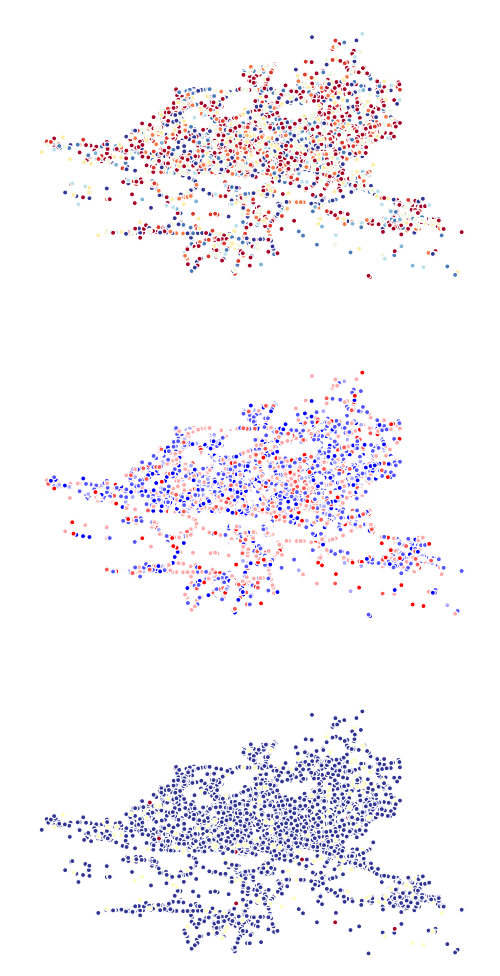

In [378]:
f,ax = plt.subplots(3,1,
                    subplot_kw=dict(aspect='equal', 
                                    frameon=False),
                    figsize=(60,15))
plt.style.use('seaborn-white')
geodf1.plot('kindocollision', ax=ax[0], cmap='RdYlBu')
geodf1.plot('typeoaccident', ax=ax[1], cmap='bwr_r')
geodf1.plot('acccategory', ax=ax[2], cmap='RdYlBu')
for i,ax_ in enumerate(ax):
    ax_.set_xticks([])
    ax_.set_yticks([])

In [379]:
# ----------------------------------------------------------------------
# **Part 2: Basic Data Visualizations**
# This section contains basic data visualizations for the overall 
# dataset without deep analytical goals. 
# ----------------------------------------------------------------------
# ----------------------------------------------------------------------
# Part 2.1: Geographical scatterplot
# ----------------------------------------------------------------------
# initialize plotly to work offline in jupyter notebook #colorscale = 'Blues', #df6['acccategory'], #cmax = 3,

scl = [[0,'#5D56D3'], [0.5,'#7CD96E'], [1,'#CC655B']]

data = [dict(type = 'scattergeo',
             lon = df7['xgcswgs84'],
             lat = df7['ygcswgs84'],
             mode = 'markers',
             marker = dict(
                 size = 3,
                 opacity = 0.85,
                 reversescale = False,
                 autocolorscale = False,
                 symbol = 'circle',
                 cmin = df7['accident_severity'].min(),
                 color = df7['accident_severity'],
                 cmax = df7['accident_severity'].max(),
                 colorbar=dict(
                     title='accident_severity')))]

layout = dict(title = '<b>2016 Hamburg Traffic Accidents</b>',
              width=1000,
              height=1000,
              geo = dict(scope = 'europe' 
                  ,projection=dict(type='mercator'),
                         lonaxis = dict(showgrid = False,
                                        gridwidth = 10,
                                        range= [9.65, 10.52],
                                        gridcolor='#000000',
                                        dtick = 5),
                         lataxis = dict(showgrid = False,
                                        gridwidth = 10,
                                        range = [53.30, 53.87],
                                        gridcolor ='#000000',
                                        dtick = 5),
            showland = True,
            landcolor = '#FFFFFF',
            subunitcolor = '#E5E5E5',
            countrycolor = 'burlywood',
            showlakes = True,
            lakecolor = 'lavender',
            showsubunits = True,
            showcountries = True,
        ))

# create figure
fig = go.Figure(dict(data=data, layout=layout))
#fig.update_layout(mapbox_style="open-street-map")
#py.image.save_as(fig, filename='Images/2016 Traffic Accidents.png')

# display plot
fig.show()

In [380]:
# map of track within the bounding box df2 = pd.DataFrame(df1)
#size = [.3]*7190
fig = px.scatter_mapbox(df8, color='accseverity_binom', 
                    color_continuous_scale=['rgb(0, 204, 150)', 'rgb(214, 69, 80)'], range_color=(0, 1),
                    lat = "ygcswgs84", lon = "xgcswgs84", hover_name="admin3", 
                    hover_data=["xgcswgs84", "ygcswgs84", "kindocollision", "typeoaccident", "lightingcond", "roadcondition", "season", "dayofweek"],
                    zoom = 10, width = 950, height = 600, center= dict(lon = 10.028896950004, lat = 53.566344849995)
                   )

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

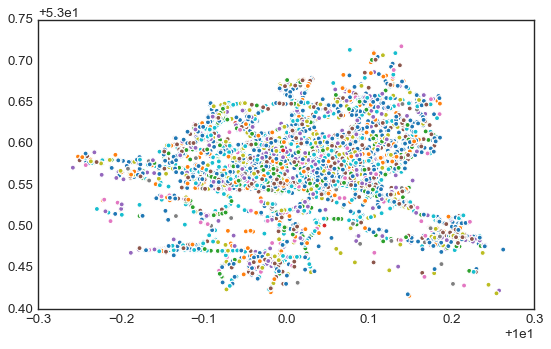

In [381]:
geodf3.plot(column='kindocollision')

## Spatial Similarity
_________
*Here I will use continuous measure of distance to define neighborhoods.*

In [385]:
wq =  lps.weights.Rook.from_dataframe(geodf2)
wq.transform = 'r'
#radius = lps.cg.sphere.RADIUS_EARTH_MILES
#threshold = lps.min_threshold_dist_from_dataframe(geodf2, radius) # now in miles, maximum nearest neighbor distance between the n observations

## Attribute Similarity
____________
*So the spatial weight between neighborhoods accidents indicates if the two are neighbors (i.e., geographically similar).* 
*What we also need is a measure of attribute similarity to pair up with this concept of spatial similarity*

In [386]:
y = geodf2['kindocollision']
ylag = lps.weights.lag_spatial(wq, y)

In [387]:
ylag

array([4.25      , 2.875     , 4.83333333, ..., 3.        , 3.11111111,
       4.44444444])

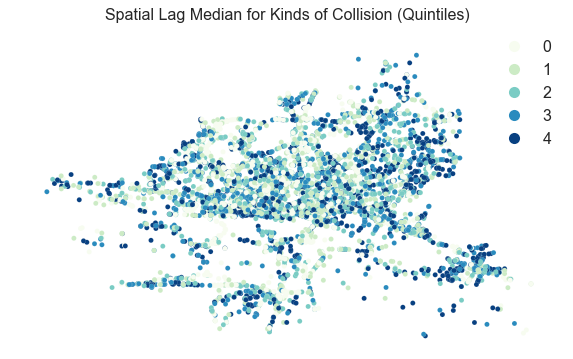

In [388]:
ylagq5 = mc.Quantiles(ylag, k=5)
f, ax = plt.subplots(1, figsize=(9, 9))
geodf2.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag Median for Kinds of Collision (Quintiles)")

plt.show()

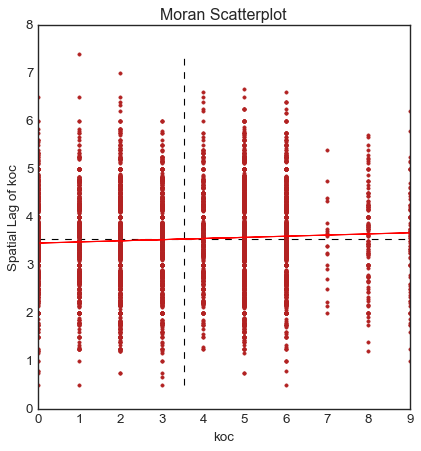

In [389]:
b,a = np.polyfit(y, ylag, 1)
f, ax = plt.subplots(1, figsize=(6, 6))

plt.plot(y, ylag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(y.mean(), ylag.min(), ylag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(ylag.mean(), y.min(), y.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(y, a + b*y, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of koc')
plt.xlabel('koc')
plt.show()

In [390]:
### Visually show the relationship between kinds of collision and their surrounding collision incidents, like in a scatterplot. 

0.023858875856012842
0.001
3.3994689668834415


Text(0.5, 1.0, '$I = 0.024 \\ \\ (p < 0.001) \\ \\ z = 3.399$')

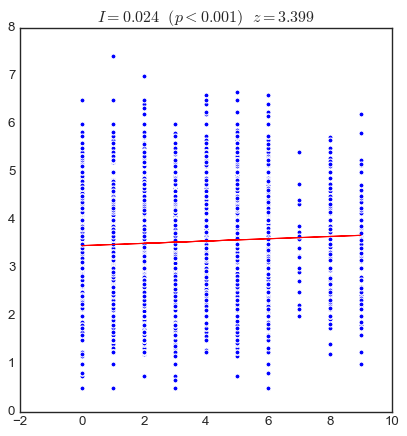

In [397]:
np.random.seed(1)
moran = esda.moran.Moran(y, wq)
print(moran.I)
print(moran.p_sim)
#print(moran.z_rand)
print(moran.z_sim)
#print(moran.z_norm)
f = plt.figure(figsize=(6,6))
plt.scatter(y, ylag)
#plt.plot((-.3,.1),(-.3,.1), color='k')
plt.plot(y, a + b*y, 'r')
plt.title('$I = {:.3f} \ \ (p < {:.3f}) \ \ z = {:.3f}$'.format(moran.I, moran.p_sim, moran.z_sim))

(-0.1, 0.1)

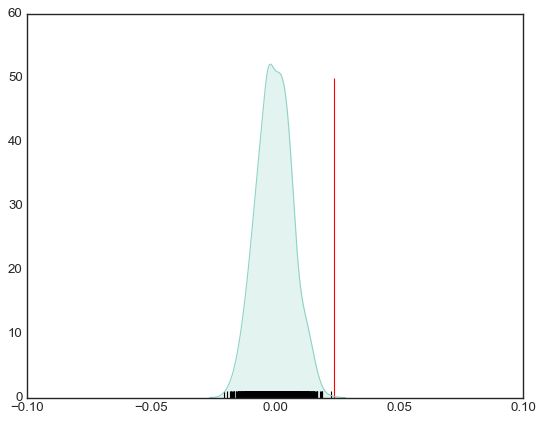

In [398]:
sns.kdeplot(moran.sim, shade=True)
plt.vlines(moran.sim, 0, 1)
plt.vlines(moran.I, 0, 50, 'r')
plt.xlim([-0.1, 0.1])

**The result of applying Moran's I is that we conclude the map pattern is not spatially random, but instead there is a signficant spatial association in different kinds of collision in Hamburg in 2016.**

### Local Moran I
#### Are there any outliers or clusters in location for these kinds of collisions using a Local Moran's $I$?

In [399]:
li = esda.moran.Moran_Local(y, wq)
(li.p_sim < 0.05).sum()

821

In [400]:
sig = li.p_sim < 0.05
hotspots = li.q==1 * sig
hotspots.sum()

209

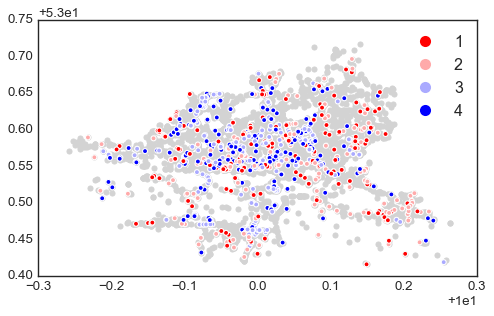

In [401]:
f = plt.figure(figsize=(10,4))
ax = plt.gca()

ax.set_aspect('equal')
geodf2.plot(color='lightgrey', ax=ax)
geodf2.assign(quads=li.q)[sig].plot('quads', 
                                         legend=True, 
                                         k=4, categorical=True,
                                         cmap='bwr_r', ax=ax)

## Global Spatial Autocorrelation
_____________
#### *Binary Case*

### Processing
----

In [402]:
#separate dtypes
notif=df5.select_dtypes(exclude=['int','float','int64'])
intfl_dtypes = df5.select_dtypes(include=['int','float','int64'])
print('Objects',notif.columns)
print("\nNonObjects",intfl_dtypes.columns)

#checking to make sure all are accounted for
print(df5.shape)
print(notif.shape)
print(intfl_dtypes.shape)

Objects Index(['dayofweek', 'kindocollision', 'typeoaccident', 'lightingcond',
       'roadcondition', 'hgv', 'season', 'accident_severity'],
      dtype='object')

NonObjects Index(['admin3', 'month', 'bicycle', 'passengercar', 'pedestrian',
       'motorcycle/scooter', 'otheraccidents'],
      dtype='object')
(7190, 15)
(7190, 8)
(7190, 7)


*Label Encoder was used instead of OneHotEncoder due to the memory errors One Hot Encoder caused in the data. The algorithms used will be classifiers, through boosting and trees, and not linear.*

In [407]:
#label encode objects
obj_le= notif.apply(LabelEncoder().fit_transform)
#re-add with non-objects
df_ml= pd.concat([obj_le,intfl_dtypes], axis=1, sort=False)
#check shape
print(df_ml.shape)

(7190, 15)


In [408]:
#Set up of X and Y
X= df_ml.drop(['accident_severity'],axis=1)
y= df_ml['accident_severity']
X

dayofweek  kindocollision  typeoaccident  lightingcond  \
level_0                                                           
0                6               9              6             1   
1                2               9              2             1   
2                1               5              1             1   
3                2               9              2             1   
4                3               7              0             0   
...            ...             ...            ...           ...   
7185             0               4              3             1   
7186             0               0              5             2   
7187             4               9              2             2   
7188             1               4              3             1   
7189             4               0              5             1   

         roadcondition  hgv  season  admin3  month  bicycle  passengercar  \
level_0                                                                     
0                    0    0       3     710      2        0             1   
1                    0    0       1     140      4        0             1   
2                    0    0       3     610      1        0             1   
3                    0    0       1     102      3        0             1   
4                    0    0       3     317      2        0             1   
...                ...  ...     ...     ...    ...      ...           ...   
7185                 0    0       3     701     12        0             1   
7186                 1    0       3     524     12        1             1   
7187                 0    0       3     320     12        0             1   
7188                 0    0       3     136     12        1             0   
7189                 0    0       3     526     12        0             1   

         pedestrian  motorcycle/scooter  otheraccidents  
level_0                                                  
0                 0                   1               0  
1                 0                   0               1  
2                 1                   0               0  
3                 0                   1               1  
4                 0                   0               0  
...             ...                 ...             ...  
7185              1                   0               0  
7186              0                   0               0  
7187              0                   0               0  
7188              0                   0               1  
7189              0                   0               0  

[7190 rows x 14 columns]

In [409]:
df_ml.accident_severity.value_counts()

0    6447
1     743
Name: accident_severity, dtype: int64

In [410]:
df5.dtypes
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7190 entries, 0 to 7189
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   admin3              7190 non-null   int64 
 1   month               7190 non-null   int64 
 2   dayofweek           7190 non-null   object
 3   kindocollision      7190 non-null   object
 4   typeoaccident       7190 non-null   object
 5   lightingcond        7190 non-null   object
 6   roadcondition       7190 non-null   object
 7   bicycle             7190 non-null   int64 
 8   passengercar        7190 non-null   int64 
 9   pedestrian          7190 non-null   int64 
 10  motorcycle/scooter  7190 non-null   int64 
 11  hgv                 7190 non-null   object
 12  otheraccidents      7190 non-null   int64 
 13  season              7190 non-null   object
 14  accident_severity   7190 non-null   object
dtypes: int64(7), object(8)
memory usage: 898.8+ KB


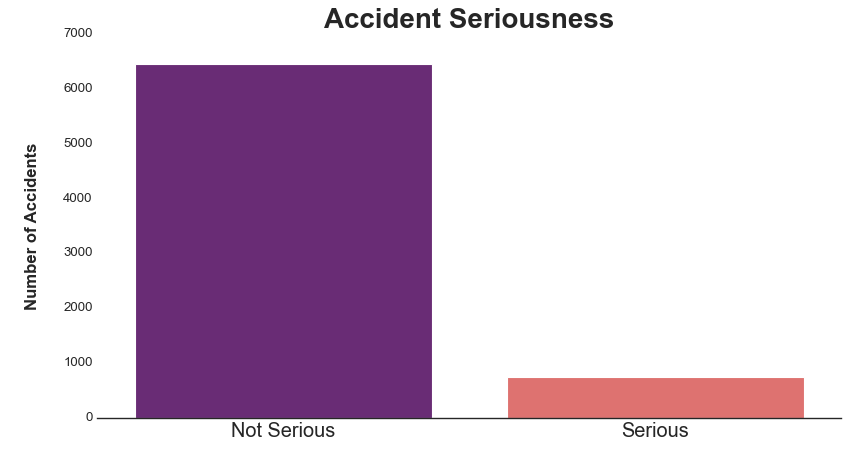

In [411]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_severity", palette="magma", data=df3)

plt.style.use('dark_background')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

### Imbalanced Data
The data in this dataset is extremely imbalanced for what we are trying to predict. We are going to resample the data as undersampling, where we reduce the number of majority (Not Serious Accidents) samples.
_____________________

The machine learning classifier algorithms that we are going to use are as follows:
```
* Bagging Classifier (sklearn)
* AdaBoost Classifier (sklearn)
* Random Forest Classifier (sklearn)
* LightGBM Classifier (LightGBM)
* XGBoost Classifier (xgboost)
* Balanced Bagging Classifier(imblearn)
* Balanced Random Forest Classifier (imblearn)
* Easy Ensemble Classifier (imblearn)

```

--------------
### Resample: Undersampling

In [414]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [416]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

# separate minority and majority classes
not_severe = res_X[res_X.accident_severity==0]
severe = res_X[res_X.accident_severity==1]

In [423]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [424]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])

newdf.accident_severity.value_counts()

1    562
0    562
Name: accident_severity, dtype: int64

In [425]:
res_X_train = newdf.drop('accident_severity', axis=1)
res_y_train = newdf.accident_severity